In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import hgflask as hgf

tilesets = [{
    'filepath': 'http://hgdownload.cse.ucsc.edu/goldenpath/hg19/encodeDCC/wgEncodeSydhTfbs/wgEncodeSydhTfbsGm12878InputStdSig.bigWig',
    'uuid': 'a'
}
]

server = hgf.start(tilesets)

diskcache_directory /tmp/hgflask/dc True
starting fuse
dc_dir /tmp/hgflask/dc 33554432
filepath http://hgdownload.cse.ucsc.edu/goldenpath/hg19/encodeDCC/wgEncodeSydhTfbs/wgEncodeSydhTfbsGm12878InputStdSig.bigWig


 * Running on http://0.0.0.0:61401/ (Press CTRL+C to quit)


sleeping


127.0.0.1 - - [26/Sep/2018 11:13:49] "GET /api/v1/tileset_info/?d=x HTTP/1.1" 200 -


returning
filetype: bigwig
read 0 65536
sending request: bytes=0-65535


127.0.0.1 - - [26/Sep/2018 11:13:50] "GET /api/v1/tileset_info/?d=a HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 11:13:51] "OPTIONS /api/v1/tileset_info/?d=a&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


filetype: bigwig
read 65536 65536
sending request: bytes=65536-131071


127.0.0.1 - - [26/Sep/2018 11:13:52] "GET /api/v1/tileset_info/?d=a&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 11:13:53] "OPTIONS /api/v1/tiles/?d=a.22.0&d=a.0.0&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


read 302645248 8192
sending request: bytes=302645248-302710783
read 302534656 24576
sending request: bytes=302514176-302579711
read 302571520 24576
sending request: bytes=302514176-302579711
sending request: bytes=302579712-302645247
read 302596096 20480
sending request: bytes=302579712-302645247
read 302616576 20480
sending request: bytes=302579712-302645247
read 302637056 8192
sending request: bytes=302579712-302645247
read 302559232 12288
sending request: bytes=302514176-302579711
read 300412928 8192
sending request: bytes=300351488-300417023
sending request: bytes=300417024-300482559
read 300429312 8192
sending request: bytes=300417024-300482559
read 300056576 24576
sending request: bytes=300023808-300089343
read 208011264 8192
sending request: bytes=208011264-208076799
read 208019456 4096
sending request: bytes=208011264-208076799
read 208023552 8192
sending request: bytes=208011264-208076799


127.0.0.1 - - [26/Sep/2018 11:13:59] "GET /api/v1/tiles/?d=a.22.0&d=a.0.0&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


In [3]:
%%time 

server.tileset_info('a')
#server.tiles('a', 0, 0)

CPU times: user 9.04 ms, sys: 6.23 ms, total: 15.3 ms
Wall time: 744 ms


{'filepath': 'http://hgdownload.cse.ucsc.edu/goldenpath/hg19/encodeDCC/wgEncodeSydhTfbs/wgEncodeSydhTfbsGm12878InputStdSig.bigWig',
 'max_pos': [4294967296],
 'max_width': 4294967296,
 'max_zoom': 22,
 'min_pos': [0],
 'tile_size': 1024,
 'uuid': 'a'}

In [4]:
import hgflask.client as hfc

hgc = hfc.HiGlassConfig()
view = hgc.add_view()
view.add_track('a', 'horizontal-bar', 'top', 
               server=server.api_address)

#print(hgc.to_json_string())
import higlass_jupyter
higlass_jupyter.HiGlassDisplay(viewconf=hgc.to_json_string())

track_type: horizontal-bar


HiGlassDisplay(viewconf='{\n  "editable": true,\n  "views": [\n    {\n      "uid": "NotWPJqcQNuHWGc0gSwKig",\n…

In [69]:
hgc = hfc.HiGlassConfig()
view = hgc.add_view()
view.add_track('CQMd6V_cRw6iCI_-Unl3PQ', 'heatmap', 'center', 
               server="http://higlass.io/api/v1",
               height=300, options={
                   'valueScaleMax': 0.01
               })

#print(hgc.to_json_string())
import higlass_jupyter
higlass_jupyter.HiGlassDisplay(viewconf=hgc.to_json_string())

HiGlassDisplay(viewconf='{\n  "editable": true,\n  "views": [\n    {\n      "uid": "WEz0EL_9RLueaz_O3Y-3SA",\n…

## Eggholder function

In [64]:
%%time

import math
import numpy as np
import itertools as it

dim = 2000

data = np.zeros((dim, dim))
for x,y in it.product(range(dim), repeat=2):
    data[x][y] = (-(y + 47) * math.sin(math.sqrt(abs(x / 2 + (y+47)))) 
                             - x * math.sin(math.sqrt(abs(x - (y+47)))))

CPU times: user 6.72 s, sys: 71.6 ms, total: 6.79 s
Wall time: 6.88 s


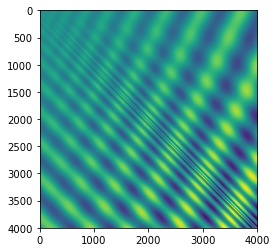

In [13]:
import matplotlib.pyplot as plt
plt.imshow(data)

In [58]:
import functools as ft
import hgtiles.npmatrix as hgnp

tilesets = [{
    'uuid': 'a',
    'handlers': {
        'tiles': ft.partial(hgnp.tiles_wrapper, data),
        'tileset_info': ft.partial(hgnp.tileset_info, data)        
        }
    }
]

server = hgf.start(tilesets)

terminating: NKo1M5BoSBmsOhRMQsLBxQ


 * Running on http://0.0.0.0:57788/ (Press CTRL+C to quit)


sleeping
grid.shape: (4000, 4000)
info: {'a': {'max_width': 4096, 'max_width1': 4096, 'min_pos': [0, 0], 'max_pos': (4000, 4000), 'max_zoom': 4, 'mirror_tiles': 'false', 'bins_per_dimension': 256}}


127.0.0.1 - - [26/Sep/2018 13:46:31] "GET /api/v1/tileset_info/?d=a HTTP/1.1" 200 -


ret: 200 b'{\n  "a": {\n    "bins_per_dimension": 256, \n    "max_pos": [\n      4000, \n      4000\n    ], \n    "max_width": 4096, \n    "max_width1": 4096, \n    "max_zoom": 4, \n    "min_pos": [\n      0, \n      0\n    ], \n    "mirror_tiles": "false"\n  }\n}\n'
returning
grid.shape: (4000, 4000)
info: {'a': {'max_width': 4096, 'max_width1': 4096, 'min_pos': [0, 0], 'max_pos': (4000, 4000), 'max_zoom': 4, 'mirror_tiles': 'false', 'bins_per_dimension': 256}}


127.0.0.1 - - [26/Sep/2018 13:46:32] "GET /api/v1/tileset_info/?d=a HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:46:33] "GET /api/v1/tiles/?d=a.0.0.0 HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:46:36] "OPTIONS /api/v1/tileset_info/?d=a&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


grid.shape: (4000, 4000)
info: {'a': {'max_width': 4096, 'max_width1': 4096, 'min_pos': [0, 0], 'max_pos': (4000, 4000), 'max_zoom': 4, 'mirror_tiles': 'false', 'bins_per_dimension': 256}}


127.0.0.1 - - [26/Sep/2018 13:46:36] "GET /api/v1/tileset_info/?d=a&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:46:36] "OPTIONS /api/v1/tiles/?d=a.4.0.0&d=a.2.0.1&d=a.2.0.2&d=a.2.1.1&d=a.2.1.2&d=a.2.2.1&d=a.2.2.2&d=a.2.3.1&d=a.2.3.2&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:46:37] "GET /api/v1/tiles/?d=a.4.0.0&d=a.2.0.1&d=a.2.0.2&d=a.2.1.1&d=a.2.1.2&d=a.2.2.1&d=a.2.2.2&d=a.2.3.1&d=a.2.3.2&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:46:39] "OPTIONS /api/v1/tiles/?d=a.3.1.3&d=a.3.1.4&d=a.3.2.3&d=a.3.2.4&d=a.3.3.3&d=a.3.3.4&d=a.3.4.3&d=a.3.4.4&d=a.3.5.3&d=a.3.5.4&d=a.3.6.3&d=a.3.6.4&d=a.3.7.3&d=a.3.7.4&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:46:40] "GET /api/v1/tiles/?d=a.3.1.3&d=a.3.1.4&d=a.3.2.3&d=a.3.2.4&d=a.3.3.3&d=a.3.3.4&d=a.3.4.3&d=a.3.4.4&d=a.3.5.3&d=a.3.5.4&d=a.3.6.3&d=a.3.6.4&d=a.3.7.3&d=a.3.7.4&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:46:40] "OPTIONS /api/v1/tiles/?d=a.4.6.7&d=a.4.6.8&d=a.4.7.7&d=a.4.7.8&d=a.4.8.7&d=a.4.8.8&d=a.4.9.7&d=a.4.9.8&d=a.4.10.7&d=a.4.10.8&d=a.4.11.7&d=a.4.11.8&d=a.4.12.7&d=a.4.12.8&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:46:42] "GET /api/v1/tiles/?d=a.4.6.7&d=a.4.6.8&d=a.4.7.7&d=a.4.7.8&d=a.4.8.7&d=a.4.8.8&d=a.4.9.7&d=a.4.9.8&d=a.4.10.7&d=a.4.10.8&d=a.4.11.7&d=a.4.11.8&d=a.4.12.7&d=a.4.12.8&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:46:48] "OPTIONS /api/v1/tiles/?d=a.4.9.8&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:46:48] "GET /api/v1/tiles/?d=a.4.9.8&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:46:50] "OPTIONS /api/v1/tiles/?d=a.4.9.7&d=a.4.10.7&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:46:50] "GET /api/v1/tiles/?d=a.4.9.7&d=a.4.10.7&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:46:51] "OPTIONS /api/v1/tiles/?d=a.4.8.7&d=a.4.8.8&d=a.4.11.7&d=a.4.11.8&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:46:51] "GET /api/v1/tiles/?d=a.4.8.7&d=a.4.8.8&d=a.4.11.7&d=a.4.11.8&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:46:52] "OPTIONS /api/v1/tiles/?d=a.4.8.9&d=a.4.9.9&d=a.4.10.9&d=a.4.11.9&d=a.4.7.6&d=a.4.7.7&d=a.4.7.8&d=a.4.7.9&d=a.4.8.6&d=a.4.9.6&d=a.4.10.6&d=a.4.11.6&d=a.4.12.6&d=a.4.12.7&d=a.4.12.8&d=a.4.12.9&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:46:54] "GET /api/v1/tiles/?d=a.4.8.9&d=a.4.9.9&d=a.4.10.9&d=a.4.11.9&d=a.4.7.6&d=a.4.7.7&d=a.4.7.8&d=a.4.7.9&d=a.4.8.6&d=a.4.9.6&d=a.4.10.6&d=a.4.11.6&d=a.4.12.6&d=a.4.12.7&d=a.4.12.8&d=a.4.12.9&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:46:54] "OPTIONS /api/v1/tiles/?d=a.4.6.6&d=a.4.6.7&d=a.4.6.8&d=a.4.6.9&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:46:54] "OPTIONS /api/v1/tiles/?d=a.3.3.3&d=a.3.3.4&d=a.3.4.3&d=a.3.4.4&d=a.3.5.3&d=a.3.5.4&d=a.3.6.3&d=a.3.6.4&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:46:54] "OPTIONS /api/v1/tiles/?d=a.3.3.2&d=a.3.4.2&d=a.3.5.2&d=a.3.6.2&d=a.3.2.2&d=a.3.2.3&d=a.3.2.4&d=a.3.2.5&d=a.3.3.5&d=a.3.4.5&d=a.3.5.5&d=a.3.6.5&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:46:54] "GET /api/v1/tiles/?d=a.4.6.6&d=a.4.6.7&d=a.4.6.8&d=a.4.6.9&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:46:55] "GET /api/v1/tiles/?d=a.3.3.3&d=a.3.3.4&d=a.3.4.3&d=a.3.4.4&d=a.3.5.3&d=a.3.5.4&d=a.3.6.3&d=a.3.6.4&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:46:57] "GET /api/v1/tiles/?d=a.3.3.2&d=a.3.4.2&d=a.3.5.2&d=a.3.6.2&d=a.3.2.2&d=a.3.2.3&d=a.3.2.4&d=a.3.2.5&d=a.3.3.5&d=a.3.4.5&d=a.3.5.5&d=a.3.6.5&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:46:57] "OPTIONS /api/v1/tiles/?d=a.3.7.2&d=a.3.7.3&d=a.3.7.4&d=a.3.7.5&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:46:58] "GET /api/v1/tiles/?d=a.3.7.2&d=a.3.7.3&d=a.3.7.4&d=a.3.7.5&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:46:58] "OPTIONS /api/v1/tiles/?d=a.3.2.2&d=a.3.3.2&d=a.3.4.2&d=a.3.5.2&d=a.3.6.2&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:46:58] "GET /api/v1/tiles/?d=a.3.2.2&d=a.3.3.2&d=a.3.4.2&d=a.3.5.2&d=a.3.6.2&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:46:58] "OPTIONS /api/v1/tiles/?d=a.3.7.2&d=a.3.7.3&d=a.3.7.4&d=a.3.7.5&d=a.3.1.2&d=a.3.1.3&d=a.3.1.4&d=a.3.1.5&d=a.2.0.1&d=a.2.0.2&d=a.2.1.1&d=a.2.1.2&d=a.2.2.1&d=a.2.2.2&d=a.2.3.1&d=a.2.3.2&d=a.2.0.0&d=a.2.1.0&d=a.2.2.0&d=a.2.3.0&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:46:58] "OPTIONS /api/v1/tiles/?d=a.2.0.3&d=a.2.1.3&d=a.2.2.3&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:47:02] "GET /api/v1/tiles/?d=a.3.7.2&d=a.3.7.3&d=a.3.7.4&d=a.3.7.5&d=a.3.1.2&d=a.3.1.3&d=a.3.1.4&d=a.3.1.5&d=a.2.0.1&d=a.2.0.2&d=a.2.1.1&d=a.2.1.2&d=a.2.2.1&d=a.2.2.2&d=a.2.3.1&d=a.2.3.2&d=a.2.0.0&d=a.2.1.0&d=a.2.2.0&d=a.2.3.0&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:47:03] "GET /api/v1/tiles/?d=a.2.0.3&d=a.2.1.3&d=a.2.2.3&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:47:03] "OPTIONS /api/v1/tiles/?d=a.3.1.6&d=a.3.2.6&d=a.3.3.6&d=a.3.4.6&d=a.3.5.6&d=a.3.6.6&d=a.3.7.6&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:47:04] "GET /api/v1/tiles/?d=a.3.1.6&d=a.3.2.6&d=a.3.3.6&d=a.3.4.6&d=a.3.5.6&d=a.3.6.6&d=a.3.7.6&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:47:04] "OPTIONS /api/v1/tiles/?d=a.4.6.8&d=a.4.6.9&d=a.4.6.10&d=a.4.6.11&d=a.4.7.8&d=a.4.7.9&d=a.4.7.10&d=a.4.7.11&d=a.4.8.8&d=a.4.8.9&d=a.4.8.10&d=a.4.8.11&d=a.4.9.8&d=a.4.9.9&d=a.4.9.10&d=a.4.9.11&d=a.4.10.8&d=a.4.10.9&d=a.4.10.10&d=a.4.10.11&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:47:04] "OPTIONS /api/v1/tiles/?d=a.4.11.8&d=a.4.11.9&d=a.4.11.10&d=a.4.11.11&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:47:08] "GET /api/v1/tiles/?d=a.4.6.8&d=a.4.6.9&d=a.4.6.10&d=a.4.6.11&d=a.4.7.8&d=a.4.7.9&d=a.4.7.10&d=a.4.7.11&d=a.4.8.8&d=a.4.8.9&d=a.4.8.10&d=a.4.8.11&d=a.4.9.8&d=a.4.9.9&d=a.4.9.10&d=a.4.9.11&d=a.4.10.8&d=a.4.10.9&d=a.4.10.10&d=a.4.10.11&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:47:09] "GET /api/v1/tiles/?d=a.4.11.8&d=a.4.11.9&d=a.4.11.10&d=a.4.11.11&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:47:13] "OPTIONS /api/v1/tiles/?d=a.4.8.9&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:47:13] "GET /api/v1/tiles/?d=a.4.8.9&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:47:13] "OPTIONS /api/v1/tiles/?d=a.4.10.9&d=a.4.8.10&d=a.4.9.10&d=a.4.10.10&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:47:14] "GET /api/v1/tiles/?d=a.4.10.9&d=a.4.8.10&d=a.4.9.10&d=a.4.10.10&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:47:14] "OPTIONS /api/v1/tiles/?d=a.4.8.8&d=a.4.9.8&d=a.4.10.8&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:47:15] "GET /api/v1/tiles/?d=a.4.8.8&d=a.4.9.8&d=a.4.10.8&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:47:15] "OPTIONS /api/v1/tiles/?d=a.4.7.8&d=a.4.7.9&d=a.4.7.10&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:47:15] "OPTIONS /api/v1/tiles/?d=a.4.11.8&d=a.4.11.9&d=a.4.11.10&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:47:15] "GET /api/v1/tiles/?d=a.4.7.8&d=a.4.7.9&d=a.4.7.10&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:47:16] "GET /api/v1/tiles/?d=a.4.11.8&d=a.4.11.9&d=a.4.11.10&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:47:16] "OPTIONS /api/v1/tiles/?d=a.4.6.8&d=a.4.6.9&d=a.4.6.10&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:47:16] "OPTIONS /api/v1/tiles/?d=a.4.6.11&d=a.4.7.11&d=a.4.8.11&d=a.4.9.11&d=a.4.10.11&d=a.4.11.11&d=a.4.6.7&d=a.4.7.7&d=a.4.8.7&d=a.4.9.7&d=a.4.10.7&d=a.4.11.7&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:47:16] "OPTIONS /api/v1/tiles/?d=a.3.3.3&d=a.3.3.4&d=a.3.3.5&d=a.3.4.3&d=a.3.4.4&d=a.3.4.5&d=a.3.5.3&d=a.3.5.4&d=a.3.5.5&d=a.3.6.3&d=a.3.6.4&d=a.3.6.5&d=a.3.2.3&d=a.3.2.4&d=a.3.2.5&d=a.3.2.6&d=a.3.3.6&d=a.3.4.6&d=a.3.5.6&d=a.3.6.6&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:47:16] "OPTIONS /api/v1/tiles/?d=a.3.1.3&d=a.3.1.4&d=a.3.1.5&d=a.3.1.6&d=a.3.7.3&d=a.3.7.4&d=a.3.7.5&d=a.3.7.6&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:47:16] "GET /api/v1/tiles/?d=a.4.6.8&d=a.4.6.9&d=a.4.6.10&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:47:18] "GET /api/v1/tiles/?d=a.4.6.11&d=a.4.7.11&d=a.4.8.11&d=a.4.9.11&d=a.4.10.11&d=a.4.11.11&d=a.4.6.7&d=a.4.7.7&d=a.4.8.7&d=a.4.9.7&d=a.4.10.7&d=a.4.11.7&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:47:21] "GET /api/v1/tiles/?d=a.3.3.3&d=a.3.3.4&d=a.3.3.5&d=a.3.4.3&d=a.3.4.4&d=a.3.4.5&d=a.3.5.3&d=a.3.5.4&d=a.3.5.5&d=a.3.6.3&d=a.3.6.4&d=a.3.6.5&d=a.3.2.3&d=a.3.2.4&d=a.3.2.5&d=a.3.2.6&d=a.3.3.6&d=a.3.4.6&d=a.3.5.6&d=a.3.6.6&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:47:22] "GET /api/v1/tiles/?d=a.3.1.3&d=a.3.1.4&d=a.3.1.5&d=a.3.1.6&d=a.3.7.3&d=a.3.7.4&d=a.3.7.5&d=a.3.7.6&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:47:22] "OPTIONS /api/v1/tiles/?d=a.2.0.1&d=a.2.0.2&d=a.2.0.3&d=a.2.1.1&d=a.2.1.2&d=a.2.1.3&d=a.2.2.1&d=a.2.2.2&d=a.2.2.3&d=a.2.3.1&d=a.2.3.2&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:47:24] "GET /api/v1/tiles/?d=a.2.0.1&d=a.2.0.2&d=a.2.0.3&d=a.2.1.1&d=a.2.1.2&d=a.2.1.3&d=a.2.2.1&d=a.2.2.2&d=a.2.2.3&d=a.2.3.1&d=a.2.3.2&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:47:29] "OPTIONS /api/v1/tiles/?d=a.2.0.0&d=a.2.1.0&d=a.2.2.0&d=a.2.3.0&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:47:29] "GET /api/v1/tiles/?d=a.2.0.0&d=a.2.1.0&d=a.2.2.0&d=a.2.3.0&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:47:36] "OPTIONS /api/v1/tiles/?d=a.3.2.3&d=a.3.2.4&d=a.3.2.5&d=a.3.2.6&d=a.3.3.3&d=a.3.3.4&d=a.3.3.5&d=a.3.3.6&d=a.3.4.3&d=a.3.4.4&d=a.3.4.5&d=a.3.4.6&d=a.3.5.3&d=a.3.5.4&d=a.3.5.5&d=a.3.5.6&d=a.3.6.3&d=a.3.6.4&d=a.3.6.5&d=a.3.6.6&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:47:36] "OPTIONS /api/v1/tiles/?d=a.3.7.3&d=a.3.7.4&d=a.3.7.5&d=a.3.7.6&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:47:38] "GET /api/v1/tiles/?d=a.3.2.3&d=a.3.2.4&d=a.3.2.5&d=a.3.2.6&d=a.3.3.3&d=a.3.3.4&d=a.3.3.5&d=a.3.3.6&d=a.3.4.3&d=a.3.4.4&d=a.3.4.5&d=a.3.4.6&d=a.3.5.3&d=a.3.5.4&d=a.3.5.5&d=a.3.5.6&d=a.3.6.3&d=a.3.6.4&d=a.3.6.5&d=a.3.6.6&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:47:39] "GET /api/v1/tiles/?d=a.3.7.3&d=a.3.7.4&d=a.3.7.5&d=a.3.7.6&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:47:39] "OPTIONS /api/v1/tiles/?d=a.2.0.0&d=a.2.1.0&d=a.2.2.0&d=a.2.3.0&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:47:39] "OPTIONS /api/v1/tiles/?d=a.4.7.8&d=a.4.7.9&d=a.4.7.10&d=a.4.7.11&d=a.4.8.8&d=a.4.8.9&d=a.4.8.10&d=a.4.8.11&d=a.4.9.8&d=a.4.9.9&d=a.4.9.10&d=a.4.9.11&d=a.4.10.8&d=a.4.10.9&d=a.4.10.10&d=a.4.10.11&d=a.4.11.8&d=a.4.11.9&d=a.4.11.10&d=a.4.11.11&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:47:39] "OPTIONS /api/v1/tiles/?d=a.4.12.8&d=a.4.12.9&d=a.4.12.10&d=a.4.12.11&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:47:40] "GET /api/v1/tiles/?d=a.2.0.0&d=a.2.1.0&d=a.2.2.0&d=a.2.3.0&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:47:43] "GET /api/v1/tiles/?d=a.4.7.8&d=a.4.7.9&d=a.4.7.10&d=a.4.7.11&d=a.4.8.8&d=a.4.8.9&d=a.4.8.10&d=a.4.8.11&d=a.4.9.8&d=a.4.9.9&d=a.4.9.10&d=a.4.9.11&d=a.4.10.8&d=a.4.10.9&d=a.4.10.10&d=a.4.10.11&d=a.4.11.8&d=a.4.11.9&d=a.4.11.10&d=a.4.11.11&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:47:44] "GET /api/v1/tiles/?d=a.4.12.8&d=a.4.12.9&d=a.4.12.10&d=a.4.12.11&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:47:54] "OPTIONS /api/v1/tiles/?d=a.4.7.8&d=a.4.7.9&d=a.4.7.10&d=a.4.7.11&d=a.4.8.8&d=a.4.8.11&d=a.4.9.8&d=a.4.9.11&d=a.4.10.8&d=a.4.10.11&d=a.4.11.8&d=a.4.11.9&d=a.4.11.10&d=a.4.11.11&d=a.4.6.8&d=a.4.6.9&d=a.4.6.10&d=a.4.6.11&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:47:57] "GET /api/v1/tiles/?d=a.4.7.8&d=a.4.7.9&d=a.4.7.10&d=a.4.7.11&d=a.4.8.8&d=a.4.8.11&d=a.4.9.8&d=a.4.9.11&d=a.4.10.8&d=a.4.10.11&d=a.4.11.8&d=a.4.11.9&d=a.4.11.10&d=a.4.11.11&d=a.4.6.8&d=a.4.6.9&d=a.4.6.10&d=a.4.6.11&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:47:57] "OPTIONS /api/v1/tiles/?d=a.3.3.4&d=a.3.3.5&d=a.3.4.4&d=a.3.4.5&d=a.3.5.4&d=a.3.5.5&d=a.3.6.4&d=a.3.6.5&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:47:57] "OPTIONS /api/v1/tiles/?d=a.3.2.4&d=a.3.2.5&d=a.3.2.6&d=a.3.3.6&d=a.3.4.6&d=a.3.5.6&d=a.3.6.6&d=a.3.2.3&d=a.3.3.3&d=a.3.4.3&d=a.3.5.3&d=a.3.6.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:47:58] "GET /api/v1/tiles/?d=a.3.3.4&d=a.3.3.5&d=a.3.4.4&d=a.3.4.5&d=a.3.5.4&d=a.3.5.5&d=a.3.6.4&d=a.3.6.5&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:48:00] "GET /api/v1/tiles/?d=a.3.2.4&d=a.3.2.5&d=a.3.2.6&d=a.3.3.6&d=a.3.4.6&d=a.3.5.6&d=a.3.6.6&d=a.3.2.3&d=a.3.3.3&d=a.3.4.3&d=a.3.5.3&d=a.3.6.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:48:01] "OPTIONS /api/v1/tiles/?d=a.4.9.9&d=a.4.9.10&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:48:01] "GET /api/v1/tiles/?d=a.4.9.9&d=a.4.9.10&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:48:09] "OPTIONS /api/v1/tiles/?d=a.4.10.9&d=a.4.10.10&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:48:09] "GET /api/v1/tiles/?d=a.4.10.9&d=a.4.10.10&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:48:09] "OPTIONS /api/v1/tiles/?d=a.4.8.9&d=a.4.8.10&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:48:09] "GET /api/v1/tiles/?d=a.4.8.9&d=a.4.8.10&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:48:19] "OPTIONS /api/v1/tiles/?d=a.4.11.9&d=a.4.11.10&d=a.4.7.9&d=a.4.7.10&d=a.4.7.8&d=a.4.8.8&d=a.4.9.8&d=a.4.10.8&d=a.4.11.8&d=a.4.7.11&d=a.4.8.11&d=a.4.9.11&d=a.4.10.11&d=a.4.11.11&d=a.4.6.8&d=a.4.6.9&d=a.4.6.10&d=a.4.6.11&d=a.4.12.8&d=a.4.12.9&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:48:19] "OPTIONS /api/v1/tiles/?d=a.4.12.10&d=a.4.12.11&d=a.3.3.4&d=a.3.3.5&d=a.3.4.4&d=a.3.4.5&d=a.3.5.4&d=a.3.5.5&d=a.3.6.4&d=a.3.6.5&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:48:21] "GET /api/v1/tiles/?d=a.4.11.9&d=a.4.11.10&d=a.4.7.9&d=a.4.7.10&d=a.4.7.8&d=a.4.8.8&d=a.4.9.8&d=a.4.10.8&d=a.4.11.8&d=a.4.7.11&d=a.4.8.11&d=a.4.9.11&d=a.4.10.11&d=a.4.11.11&d=a.4.6.8&d=a.4.6.9&d=a.4.6.10&d=a.4.6.11&d=a.4.12.8&d=a.4.12.9&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:48:22] "GET /api/v1/tiles/?d=a.4.12.10&d=a.4.12.11&d=a.3.3.4&d=a.3.3.5&d=a.3.4.4&d=a.3.4.5&d=a.3.5.4&d=a.3.5.5&d=a.3.6.4&d=a.3.6.5&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:48:22] "OPTIONS /api/v1/tiles/?d=a.3.2.3&d=a.3.2.4&d=a.3.2.5&d=a.3.3.3&d=a.3.4.3&d=a.3.5.3&d=a.3.6.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:48:23] "GET /api/v1/tiles/?d=a.3.2.3&d=a.3.2.4&d=a.3.2.5&d=a.3.3.3&d=a.3.4.3&d=a.3.5.3&d=a.3.6.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:48:28] "OPTIONS /api/v1/tiles/?d=a.4.6.8&d=a.4.6.9&d=a.4.6.10&d=a.4.6.11&d=a.4.7.8&d=a.4.7.9&d=a.4.7.10&d=a.4.7.11&d=a.4.8.8&d=a.4.8.9&d=a.4.8.10&d=a.4.8.11&d=a.4.9.8&d=a.4.9.9&d=a.4.9.10&d=a.4.9.11&d=a.4.10.8&d=a.4.10.9&d=a.4.10.10&d=a.4.10.11&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:48:28] "OPTIONS /api/v1/tiles/?d=a.4.11.8&d=a.4.11.9&d=a.4.11.10&d=a.4.11.11&d=a.4.12.8&d=a.4.12.9&d=a.4.12.10&d=a.4.12.11&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:48:30] "GET /api/v1/tiles/?d=a.4.6.8&d=a.4.6.9&d=a.4.6.10&d=a.4.6.11&d=a.4.7.8&d=a.4.7.9&d=a.4.7.10&d=a.4.7.11&d=a.4.8.8&d=a.4.8.9&d=a.4.8.10&d=a.4.8.11&d=a.4.9.8&d=a.4.9.9&d=a.4.9.10&d=a.4.9.11&d=a.4.10.8&d=a.4.10.9&d=a.4.10.10&d=a.4.10.11&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:48:31] "GET /api/v1/tiles/?d=a.4.11.8&d=a.4.11.9&d=a.4.11.10&d=a.4.11.11&d=a.4.12.8&d=a.4.12.9&d=a.4.12.10&d=a.4.12.11&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:48:31] "OPTIONS /api/v1/tiles/?d=a.3.2.3&d=a.3.2.4&d=a.3.2.5&d=a.3.3.3&d=a.3.4.3&d=a.3.5.3&d=a.3.6.3&d=a.3.2.6&d=a.3.3.6&d=a.3.4.6&d=a.3.5.6&d=a.3.6.6&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:48:31] "OPTIONS /api/v1/tiles/?d=a.3.1.3&d=a.3.1.4&d=a.3.1.5&d=a.3.1.6&d=a.3.7.3&d=a.3.7.4&d=a.3.7.5&d=a.3.7.6&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:48:33] "GET /api/v1/tiles/?d=a.3.2.3&d=a.3.2.4&d=a.3.2.5&d=a.3.3.3&d=a.3.4.3&d=a.3.5.3&d=a.3.6.3&d=a.3.2.6&d=a.3.3.6&d=a.3.4.6&d=a.3.5.6&d=a.3.6.6&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:48:34] "GET /api/v1/tiles/?d=a.3.1.3&d=a.3.1.4&d=a.3.1.5&d=a.3.1.6&d=a.3.7.3&d=a.3.7.4&d=a.3.7.5&d=a.3.7.6&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:48:40] "OPTIONS /api/v1/tiles/?d=a.3.1.3&d=a.3.1.4&d=a.3.1.5&d=a.3.1.6&d=a.3.7.3&d=a.3.7.4&d=a.3.7.5&d=a.3.7.6&d=a.2.0.1&d=a.2.0.2&d=a.2.0.3&d=a.2.1.1&d=a.2.1.2&d=a.2.1.3&d=a.2.2.1&d=a.2.2.2&d=a.2.2.3&d=a.2.3.1&d=a.2.3.2&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:48:43] "GET /api/v1/tiles/?d=a.3.1.3&d=a.3.1.4&d=a.3.1.5&d=a.3.1.6&d=a.3.7.3&d=a.3.7.4&d=a.3.7.5&d=a.3.7.6&d=a.2.0.1&d=a.2.0.2&d=a.2.0.3&d=a.2.1.1&d=a.2.1.2&d=a.2.1.3&d=a.2.2.1&d=a.2.2.2&d=a.2.2.3&d=a.2.3.1&d=a.2.3.2&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:49:01] "OPTIONS /api/v1/tileset_info/?d=a&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


grid.shape: (4000, 4000)
info: {'a': {'max_width': 4096, 'max_width1': 4096, 'min_pos': [0, 0], 'max_pos': (4000, 4000), 'max_zoom': 4, 'mirror_tiles': 'false', 'bins_per_dimension': 256}}


127.0.0.1 - - [26/Sep/2018 13:49:01] "GET /api/v1/tileset_info/?d=a&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:49:01] "OPTIONS /api/v1/tiles/?d=a.4.0.0&d=a.2.0.1&d=a.2.0.2&d=a.2.1.1&d=a.2.1.2&d=a.2.2.1&d=a.2.2.2&d=a.2.3.1&d=a.2.3.2&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:49:02] "GET /api/v1/tiles/?d=a.4.0.0&d=a.2.0.1&d=a.2.0.2&d=a.2.1.1&d=a.2.1.2&d=a.2.2.1&d=a.2.2.2&d=a.2.3.1&d=a.2.3.2&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:49:04] "OPTIONS /api/v1/tiles/?d=a.3.1.3&d=a.3.1.4&d=a.3.2.3&d=a.3.2.4&d=a.3.3.3&d=a.3.3.4&d=a.3.4.3&d=a.3.4.4&d=a.3.5.3&d=a.3.5.4&d=a.3.6.3&d=a.3.6.4&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:49:06] "GET /api/v1/tiles/?d=a.3.1.3&d=a.3.1.4&d=a.3.2.3&d=a.3.2.4&d=a.3.3.3&d=a.3.3.4&d=a.3.4.3&d=a.3.4.4&d=a.3.5.3&d=a.3.5.4&d=a.3.6.3&d=a.3.6.4&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:49:06] "OPTIONS /api/v1/tiles/?d=a.4.5.7&d=a.4.5.8&d=a.4.6.7&d=a.4.6.8&d=a.4.7.7&d=a.4.7.8&d=a.4.8.7&d=a.4.8.8&d=a.4.9.7&d=a.4.9.8&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:49:08] "GET /api/v1/tiles/?d=a.4.5.7&d=a.4.5.8&d=a.4.6.7&d=a.4.6.8&d=a.4.7.7&d=a.4.7.8&d=a.4.8.7&d=a.4.8.8&d=a.4.9.7&d=a.4.9.8&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:49:13] "OPTIONS /api/v1/tileset_info/?d=a&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


grid.shape: (4000, 4000)
info: {'a': {'max_width': 4096, 'max_width1': 4096, 'min_pos': [0, 0], 'max_pos': (4000, 4000), 'max_zoom': 4, 'mirror_tiles': 'false', 'bins_per_dimension': 256}}


127.0.0.1 - - [26/Sep/2018 13:49:13] "GET /api/v1/tileset_info/?d=a&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:49:13] "OPTIONS /api/v1/tiles/?d=a.4.0.0&d=a.2.0.1&d=a.2.0.2&d=a.2.1.1&d=a.2.1.2&d=a.2.2.1&d=a.2.2.2&d=a.2.3.1&d=a.2.3.2&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:49:15] "GET /api/v1/tiles/?d=a.4.0.0&d=a.2.0.1&d=a.2.0.2&d=a.2.1.1&d=a.2.1.2&d=a.2.2.1&d=a.2.2.2&d=a.2.3.1&d=a.2.3.2&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:49:16] "OPTIONS /api/v1/tiles/?d=a.3.1.3&d=a.3.1.4&d=a.3.1.5&d=a.3.2.3&d=a.3.2.4&d=a.3.2.5&d=a.3.3.3&d=a.3.3.4&d=a.3.3.5&d=a.3.4.3&d=a.3.4.4&d=a.3.4.5&d=a.3.5.3&d=a.3.5.4&d=a.3.5.5&d=a.3.6.3&d=a.3.6.4&d=a.3.6.5&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:49:19] "GET /api/v1/tiles/?d=a.3.1.3&d=a.3.1.4&d=a.3.1.5&d=a.3.2.3&d=a.3.2.4&d=a.3.2.5&d=a.3.3.3&d=a.3.3.4&d=a.3.3.5&d=a.3.4.3&d=a.3.4.4&d=a.3.4.5&d=a.3.5.3&d=a.3.5.4&d=a.3.5.5&d=a.3.6.3&d=a.3.6.4&d=a.3.6.5&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:49:19] "OPTIONS /api/v1/tiles/?d=a.3.3.6&d=a.3.4.6&d=a.3.5.6&d=a.3.6.6&d=a.3.7.4&d=a.3.7.5&d=a.3.7.6&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:49:19] "OPTIONS /api/v1/tiles/?d=a.4.7.9&d=a.4.7.10&d=a.4.7.11&d=a.4.8.9&d=a.4.8.10&d=a.4.8.11&d=a.4.9.9&d=a.4.9.10&d=a.4.9.11&d=a.4.10.9&d=a.4.10.10&d=a.4.10.11&d=a.4.11.9&d=a.4.11.10&d=a.4.11.11&d=a.4.12.9&d=a.4.12.10&d=a.4.12.11&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:49:21] "GET /api/v1/tiles/?d=a.3.3.6&d=a.3.4.6&d=a.3.5.6&d=a.3.6.6&d=a.3.7.4&d=a.3.7.5&d=a.3.7.6&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:49:23] "GET /api/v1/tiles/?d=a.4.7.9&d=a.4.7.10&d=a.4.7.11&d=a.4.8.9&d=a.4.8.10&d=a.4.8.11&d=a.4.9.9&d=a.4.9.10&d=a.4.9.11&d=a.4.10.9&d=a.4.10.10&d=a.4.10.11&d=a.4.11.9&d=a.4.11.10&d=a.4.11.11&d=a.4.12.9&d=a.4.12.10&d=a.4.12.11&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:49:26] "OPTIONS /api/v1/tiles/?d=a.4.11.9&d=a.4.11.10&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:49:27] "GET /api/v1/tiles/?d=a.4.11.9&d=a.4.11.10&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:49:27] "OPTIONS /api/v1/tiles/?d=a.3.3.4&d=a.3.3.5&d=a.3.4.4&d=a.3.4.5&d=a.3.5.4&d=a.3.5.5&d=a.3.6.4&d=a.3.6.5&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:49:29] "GET /api/v1/tiles/?d=a.3.3.4&d=a.3.3.5&d=a.3.4.4&d=a.3.4.5&d=a.3.5.4&d=a.3.5.5&d=a.3.6.4&d=a.3.6.5&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:49:29] "OPTIONS /api/v1/tiles/?d=a.3.3.3&d=a.3.4.3&d=a.3.5.3&d=a.3.6.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:49:29] "GET /api/v1/tiles/?d=a.3.3.3&d=a.3.4.3&d=a.3.5.3&d=a.3.6.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:49:33] "OPTIONS /api/v1/tiles/?d=a.2.0.1&d=a.2.0.2&d=a.2.0.3&d=a.2.1.1&d=a.2.1.2&d=a.2.1.3&d=a.2.2.1&d=a.2.2.2&d=a.2.2.3&d=a.2.3.1&d=a.2.3.2&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:49:34] "GET /api/v1/tiles/?d=a.2.0.1&d=a.2.0.2&d=a.2.0.3&d=a.2.1.1&d=a.2.1.2&d=a.2.1.3&d=a.2.2.1&d=a.2.2.2&d=a.2.2.3&d=a.2.3.1&d=a.2.3.2&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:51:13] "OPTIONS /api/v1/tiles/?d=a.3.2.3&d=a.3.2.4&d=a.3.2.5&d=a.3.3.3&d=a.3.3.4&d=a.3.3.5&d=a.3.4.3&d=a.3.4.4&d=a.3.4.5&d=a.3.5.3&d=a.3.5.4&d=a.3.5.5&d=a.3.6.3&d=a.3.6.4&d=a.3.6.5&d=a.3.7.3&d=a.3.7.4&d=a.3.7.5&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:51:17] "GET /api/v1/tiles/?d=a.3.2.3&d=a.3.2.4&d=a.3.2.5&d=a.3.3.3&d=a.3.3.4&d=a.3.3.5&d=a.3.4.3&d=a.3.4.4&d=a.3.4.5&d=a.3.5.3&d=a.3.5.4&d=a.3.5.5&d=a.3.6.3&d=a.3.6.4&d=a.3.6.5&d=a.3.7.3&d=a.3.7.4&d=a.3.7.5&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:51:17] "OPTIONS /api/v1/tiles/?d=a.4.7.8&d=a.4.7.9&d=a.4.7.10&d=a.4.8.8&d=a.4.8.9&d=a.4.8.10&d=a.4.9.8&d=a.4.9.9&d=a.4.9.10&d=a.4.10.8&d=a.4.10.9&d=a.4.10.10&d=a.4.11.8&d=a.4.11.9&d=a.4.11.10&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:51:19] "GET /api/v1/tiles/?d=a.4.7.8&d=a.4.7.9&d=a.4.7.10&d=a.4.8.8&d=a.4.8.9&d=a.4.8.10&d=a.4.9.8&d=a.4.9.9&d=a.4.9.10&d=a.4.10.8&d=a.4.10.9&d=a.4.10.10&d=a.4.11.8&d=a.4.11.9&d=a.4.11.10&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:55:45] "OPTIONS /api/v1/tiles/?d=a.4.8.9&d=a.4.8.10&d=a.4.9.10&d=a.4.10.9&d=a.4.10.10&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:55:46] "GET /api/v1/tiles/?d=a.4.8.9&d=a.4.8.10&d=a.4.9.10&d=a.4.10.9&d=a.4.10.10&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:55:46] "OPTIONS /api/v1/tiles/?d=a.4.7.8&d=a.4.7.9&d=a.4.7.10&d=a.4.8.8&d=a.4.9.8&d=a.4.10.8&d=a.4.11.8&d=a.4.11.9&d=a.4.11.10&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:55:49] "GET /api/v1/tiles/?d=a.4.7.8&d=a.4.7.9&d=a.4.7.10&d=a.4.8.8&d=a.4.9.8&d=a.4.10.8&d=a.4.11.8&d=a.4.11.9&d=a.4.11.10&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:55:49] "OPTIONS /api/v1/tiles/?d=a.2.0.1&d=a.2.0.2&d=a.2.0.3&d=a.2.1.1&d=a.2.1.2&d=a.2.1.3&d=a.2.2.1&d=a.2.2.2&d=a.2.2.3&d=a.2.3.1&d=a.2.3.2&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:55:52] "GET /api/v1/tiles/?d=a.2.0.1&d=a.2.0.2&d=a.2.0.3&d=a.2.1.1&d=a.2.1.2&d=a.2.1.3&d=a.2.2.1&d=a.2.2.2&d=a.2.2.3&d=a.2.3.1&d=a.2.3.2&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:55:54] "OPTIONS /api/v1/tiles/?d=a.3.2.3&d=a.3.2.4&d=a.3.2.5&d=a.3.3.3&d=a.3.3.4&d=a.3.3.5&d=a.3.4.3&d=a.3.4.4&d=a.3.4.5&d=a.3.5.3&d=a.3.5.4&d=a.3.5.5&d=a.3.6.3&d=a.3.6.4&d=a.3.6.5&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:55:57] "GET /api/v1/tiles/?d=a.3.2.3&d=a.3.2.4&d=a.3.2.5&d=a.3.3.3&d=a.3.3.4&d=a.3.3.5&d=a.3.4.3&d=a.3.4.4&d=a.3.4.5&d=a.3.5.3&d=a.3.5.4&d=a.3.5.5&d=a.3.6.3&d=a.3.6.4&d=a.3.6.5&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:55:57] "OPTIONS /api/v1/tiles/?d=a.4.7.8&d=a.4.7.9&d=a.4.7.10&d=a.4.8.8&d=a.4.8.9&d=a.4.8.10&d=a.4.9.8&d=a.4.9.9&d=a.4.9.10&d=a.4.10.8&d=a.4.10.9&d=a.4.10.10&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:55:59] "GET /api/v1/tiles/?d=a.4.7.8&d=a.4.7.9&d=a.4.7.10&d=a.4.8.8&d=a.4.8.9&d=a.4.8.10&d=a.4.9.8&d=a.4.9.9&d=a.4.9.10&d=a.4.10.8&d=a.4.10.9&d=a.4.10.10&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:58:27] "OPTIONS /api/v1/tiles/?d=a.4.8.9&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:58:28] "GET /api/v1/tiles/?d=a.4.8.9&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:58:28] "OPTIONS /api/v1/tiles/?d=a.4.10.9&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:58:28] "GET /api/v1/tiles/?d=a.4.10.9&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:58:29] "OPTIONS /api/v1/tiles/?d=a.4.7.8&d=a.4.7.9&d=a.4.7.10&d=a.4.8.8&d=a.4.8.10&d=a.4.9.8&d=a.4.9.10&d=a.4.10.8&d=a.4.10.10&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:58:30] "GET /api/v1/tiles/?d=a.4.7.8&d=a.4.7.9&d=a.4.7.10&d=a.4.8.8&d=a.4.8.10&d=a.4.9.8&d=a.4.9.10&d=a.4.10.8&d=a.4.10.10&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:59:09] "OPTIONS /api/v1/tileset_info/?d=a&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


grid.shape: (4000, 4000)
info: {'a': {'max_width': 4096, 'max_width1': 4096, 'min_pos': [0, 0], 'max_pos': (4000, 4000), 'max_zoom': 4, 'mirror_tiles': 'false', 'bins_per_dimension': 256}}


127.0.0.1 - - [26/Sep/2018 13:59:09] "GET /api/v1/tileset_info/?d=a&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:59:09] "OPTIONS /api/v1/tiles/?d=a.4.0.0&d=a.2.0.1&d=a.2.0.2&d=a.2.1.1&d=a.2.1.2&d=a.2.2.1&d=a.2.2.2&d=a.2.3.1&d=a.2.3.2&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:59:10] "GET /api/v1/tiles/?d=a.4.0.0&d=a.2.0.1&d=a.2.0.2&d=a.2.1.1&d=a.2.1.2&d=a.2.2.1&d=a.2.2.2&d=a.2.3.1&d=a.2.3.2&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:59:17] "OPTIONS /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&d=a.1.1.0&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:59:21] "GET /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&d=a.1.1.0&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:59:34] "OPTIONS /api/v1/tileset_info/?d=a&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


grid.shape: (4000, 4000)
info: {'a': {'max_width': 4096, 'max_width1': 4096, 'min_pos': [0, 0], 'max_pos': (4000, 4000), 'max_zoom': 4, 'mirror_tiles': 'false', 'bins_per_dimension': 256}}


127.0.0.1 - - [26/Sep/2018 13:59:34] "GET /api/v1/tileset_info/?d=a&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:59:34] "OPTIONS /api/v1/tiles/?d=a.4.0.0&d=a.1.0.0&d=a.1.0.1&d=a.1.1.0&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:59:35] "GET /api/v1/tiles/?d=a.4.0.0&d=a.1.0.0&d=a.1.0.1&d=a.1.1.0&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:59:40] "OPTIONS /api/v1/tileset_info/?d=a&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


grid.shape: (4000, 4000)
info: {'a': {'max_width': 4096, 'max_width1': 4096, 'min_pos': [0, 0], 'max_pos': (4000, 4000), 'max_zoom': 4, 'mirror_tiles': 'false', 'bins_per_dimension': 256}}


127.0.0.1 - - [26/Sep/2018 13:59:40] "GET /api/v1/tileset_info/?d=a&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 13:59:40] "OPTIONS /api/v1/tiles/?d=a.4.0.0&d=a.1.0.0&d=a.1.0.1&d=a.1.1.0&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 13:59:41] "GET /api/v1/tiles/?d=a.4.0.0&d=a.1.0.0&d=a.1.0.1&d=a.1.1.0&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 14:04:15] "OPTIONS /api/v1/tileset_info/?d=a&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


grid.shape: (4000, 4000)
info: {'a': {'max_width': 4096, 'max_width1': 4096, 'min_pos': [0, 0], 'max_pos': (4000, 4000), 'max_zoom': 4, 'mirror_tiles': 'false', 'bins_per_dimension': 256}}


127.0.0.1 - - [26/Sep/2018 14:04:15] "GET /api/v1/tileset_info/?d=a&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 14:04:15] "OPTIONS /api/v1/tiles/?d=a.4.0.0&d=a.1.0.0&d=a.1.0.1&d=a.1.1.0&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 14:04:16] "GET /api/v1/tiles/?d=a.4.0.0&d=a.1.0.0&d=a.1.0.1&d=a.1.1.0&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 14:04:18] "OPTIONS /api/v1/tiles/?d=a.2.0.1&d=a.2.0.2&d=a.2.1.1&d=a.2.1.2&d=a.2.2.1&d=a.2.2.2&d=a.2.3.1&d=a.2.3.2&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 14:04:19] "GET /api/v1/tiles/?d=a.2.0.1&d=a.2.0.2&d=a.2.1.1&d=a.2.1.2&d=a.2.2.1&d=a.2.2.2&d=a.2.3.1&d=a.2.3.2&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 14:04:19] "OPTIONS /api/v1/tiles/?d=a.3.2.3&d=a.3.2.4&d=a.3.2.5&d=a.3.3.3&d=a.3.3.4&d=a.3.3.5&d=a.3.4.3&d=a.3.4.4&d=a.3.4.5&d=a.3.5.3&d=a.3.5.4&d=a.3.5.5&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 14:04:21] "GET /api/v1/tiles/?d=a.3.2.3&d=a.3.2.4&d=a.3.2.5&d=a.3.3.3&d=a.3.3.4&d=a.3.3.5&d=a.3.4.3&d=a.3.4.4&d=a.3.4.5&d=a.3.5.3&d=a.3.5.4&d=a.3.5.5&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 14:04:22] "OPTIONS /api/v1/tiles/?d=a.4.7.8&d=a.4.7.9&d=a.4.8.8&d=a.4.8.9&d=a.4.9.8&d=a.4.9.9&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 14:04:23] "GET /api/v1/tiles/?d=a.4.7.8&d=a.4.7.9&d=a.4.8.8&d=a.4.8.9&d=a.4.9.8&d=a.4.9.9&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 14:04:23] "OPTIONS /api/v1/tiles/?d=a.4.10.8&d=a.4.10.9&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 14:04:23] "GET /api/v1/tiles/?d=a.4.10.8&d=a.4.10.9&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 14:04:45] "OPTIONS /api/v1/tiles/?d=a.2.0.1&d=a.2.0.2&d=a.2.0.3&d=a.2.1.1&d=a.2.1.2&d=a.2.1.3&d=a.2.2.1&d=a.2.2.2&d=a.2.2.3&d=a.2.3.1&d=a.2.3.2&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 14:04:47] "GET /api/v1/tiles/?d=a.2.0.1&d=a.2.0.2&d=a.2.0.3&d=a.2.1.1&d=a.2.1.2&d=a.2.1.3&d=a.2.2.1&d=a.2.2.2&d=a.2.2.3&d=a.2.3.1&d=a.2.3.2&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 14:04:49] "OPTIONS /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&d=a.1.1.0&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 14:04:50] "GET /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&d=a.1.1.0&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 14:04:56] "OPTIONS /api/v1/tiles/?d=a.2.0.1&d=a.2.0.2&d=a.2.0.3&d=a.2.1.1&d=a.2.1.2&d=a.2.1.3&d=a.2.2.1&d=a.2.2.2&d=a.2.2.3&d=a.2.3.1&d=a.2.3.2&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 14:04:57] "GET /api/v1/tiles/?d=a.2.0.1&d=a.2.0.2&d=a.2.0.3&d=a.2.1.1&d=a.2.1.2&d=a.2.1.3&d=a.2.2.1&d=a.2.2.2&d=a.2.2.3&d=a.2.3.1&d=a.2.3.2&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 14:05:01] "OPTIONS /api/v1/tiles/?d=a.3.2.4&d=a.3.2.5&d=a.3.2.6&d=a.3.3.4&d=a.3.3.5&d=a.3.3.6&d=a.3.4.4&d=a.3.4.5&d=a.3.4.6&d=a.3.5.4&d=a.3.5.5&d=a.3.5.6&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 14:05:03] "GET /api/v1/tiles/?d=a.3.2.4&d=a.3.2.5&d=a.3.2.6&d=a.3.3.4&d=a.3.3.5&d=a.3.3.6&d=a.3.4.4&d=a.3.4.5&d=a.3.4.6&d=a.3.5.4&d=a.3.5.5&d=a.3.5.6&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 14:05:03] "OPTIONS /api/v1/tiles/?d=a.3.3.3&d=a.3.4.3&d=a.3.5.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 14:05:03] "GET /api/v1/tiles/?d=a.3.3.3&d=a.3.4.3&d=a.3.5.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 14:05:06] "OPTIONS /api/v1/tiles/?d=a.2.0.1&d=a.2.0.2&d=a.2.1.1&d=a.2.1.2&d=a.2.2.1&d=a.2.2.2&d=a.2.3.1&d=a.2.3.2&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 14:05:07] "GET /api/v1/tiles/?d=a.2.0.1&d=a.2.0.2&d=a.2.1.1&d=a.2.1.2&d=a.2.2.1&d=a.2.2.2&d=a.2.3.1&d=a.2.3.2&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 14:31:36] "OPTIONS /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&d=a.1.1.0&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0
divisible_x_pad: 0
divisible_y_pad: 0


127.0.0.1 - - [26/Sep/2018 14:31:37] "GET /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&d=a.1.1.0&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


In [59]:
print(server.api_address)
#server.tileset_info('a')
#server.tiles('a', 0, 0, 0)

http://localhost:57788/api/v1


{'dense': 'a+9Sxjg/XMakQx1EzdacRj8E8ka2X8tGND/ORck2l8aLSCLHUTZJx2HmMMengbzG+SfIRZv2FUdxGHlHevuUR20JjkftmlBH0lOqRhfmfsZhWlPHdOWlxyYaysfh8s/HVuq1x2yIfsexTs3GGfqORmjqdEcVjcVHs2T7RxCLCkiZlAdIJ9TpR33OqEe6iiVHzG/3xWvhZ8d6l9DH+R4OyDa5J8i+kDLIAHwtyHPAGMgsAezHLhqQxxv5lMYk8xdHS4e6R1/YDkj62DZIXSZSSFOaXkjnKFtIE+xHSDMaJkh10u9HesOAR8ZwSUWIQG/HwuHwx43bLsiCmlvIltd7yEvChsgpu4fIoriAyNMnZMgCKznIHs8CyPMMiMe8+lLDswSKRx7uB0j+AkVIDAl5SGCikEgKzJ1IY02jSGPUoEhSc5ZIIJ6ESCZGWEgBPxxIbMSvR7CXZEau43THZkEHyPeBTMiQ84TIm1yeyHdcscj1Gr3IXw/ByOwEvcimG7HI0MWdyADCg8jHJEjI2cX/x9gmRscGE/9GdYTiR/d6P0j3yYNIWGmjSAhqvUi20NBIvuDcSB4i4UjaZN1IucHRSHGYvkhli6RIMHmESHfoPkgz49pHMh26RiyMgceOwxfIi9hqyC6mm8j4T73Iy1DZyPi+7sjO5vzIx6cByUTfAMknOPjIHP/myKORzsgJpa/Ioh+LyNsiRMhfrtbHyeZmxiTSn0fT+CxIGguDSNdarEhvPtFIb6nwSKPbBEmV2A1JTwkTSUtGFEmCgxFJe9AKSZxXAEmFueRIdHbCSEPGmkggWV1IUSX9R3MT3UYL6pHHd6gsyDd6hsijtrPIK+fcyP2BAMn5kg/JCEYbydlPI8nzeyfJva0nyfvgI8mrKRzJW7MQyeq/AcmoS9/I+Zu1yEVih8jdUyvIv0eGx2POHUeLDhJIlUp6SEPqrkizOt1IrYcDSWW9FUku1yRJN38wSeJyOEkNh

In [68]:
hgc = hfc.HiGlassConfig()
view = hgc.add_view()
view.add_track('a', 'heatmap', 'center', 
               server=server.api_address,
               height=200, options={
                   'colorRange': ['white', 'black']
               })
view.add_track(None, 'top-axis', 'top')
view.add_track(None, 'left-axis', 'left')


#print(hgc.to_json_string())
import higlass_jupyter
higlass_jupyter.HiGlassDisplay(viewconf=hgc.to_json_string())

HiGlassDisplay(viewconf='{\n  "editable": true,\n  "views": [\n    {\n      "uid": "c5eALhERQfOaKFQG0nzc_A",\n…

## Cross-in-tray Function

In [146]:
import hgtiles.utils as hgut
import hgtiles.format as hgfo

def cross_in_tray(x,y):
    return (
        -.0001 * (
            np.absolute(
                np.sin(x) * np.sin(y) * np.exp(
                    np.absolute(
                        100 - np.sqrt(x**2 + y**2) / math.pi
                    )
                ) + 1)
           ) ** 0.1
    )

def tileset_info():
    bounds = [-10, -10, 10, 10]
    max_width = max(bounds[2] - bounds[0], bounds[3] - bounds[1])
    
    return {
        'max_zoom': 100,
        'min_pos': [bounds[0], bounds[1]],
        'max_pos': [bounds[2], bounds[3]],
        'max_width': max_width,
        'bins_per_dimension': 256,
    }

def tiles(tsinfo, z, x, y):
    [from_x, from_y, to_x, to_y] = hgut.tile_bounds(tsinfo, z, x, y)
    
    tile_size = tsinfo['bins_per_dimension']
    xs = np.linspace(from_x, to_x, tile_size)
    ys = np.linspace(from_y, to_y, tile_size)
    
    xv, yv = np.meshgrid(xs, ys)
    print(xv.ravel())
    print(yv.ravel())
    
    vals = cross_in_tray(xv.ravel(), yv.ravel())
    #print("vals", vals[1000:2000])
    return hgfo.format_dense_tile(vals)
    
tilesets = [{
    'uuid': 'a',
    'handlers': {
        'tileset_info': tileset_info,
        'tiles': ft.partial(hgut.tiles_wrapper_2d, 
                            tiles_function=ft.partial(tiles, tileset_info()))
    }
}]

tsinfo = tileset_info()
tiles(tsinfo, 0, 0, 0)

[-10.          -9.92156863  -9.84313725 ...   9.84313725   9.92156863
  10.        ]
[-10. -10. -10. ...  10.  10.  10.]


{'dense': '+bzrvNm8w7ymvH+8Q7xvu/q7YbyYvMC83rz4vA29H70vvT69Sr1VvV+9aL1vvXa9fL2AvYS9h72JvYq9i72KvYi9hr2CvX29d71vvWa9W71OvT+9K70UvfW8zLyNvAS8NLyjvN+8Cb0pvUS9Wr1tvX69jL2ZvaS9rr23vb69xL3Kvc690r3Uvda91r3WvdS90r3Ovcq9xL29vbS9qr2evZC9f71qvVG9Mb0GvcW8PrxYvNG8EL08vV29eL2OvaK9sr3Avc29173hvem97731vfq9/b0AvgG+Ar4BvgC+/r36vfa98L3pveG9173Mvb69r72cvYa9bL1LvR+93rxdvF283rwfvUu9bL2GvZy9r72+vcy9173hvem98L32vfq9/r0AvgG+Ar4BvgC+/b36vfW9773pveG9173NvcC9sr2ivY69eL1dvTy9EL3RvFi8PrzFvAa9Mb1RvWq9f72QvZ69qr20vb29xL3Kvc690r3Uvda91r3WvdS90r3Ovcq9xL2+vbe9rr2kvZm9jL1+vW29Wr1EvSm9Cb3fvKO8NLwEvI28zLz1vBS9K70/vU69W71mvW+9d719vYK9hr2IvYq9i72KvYm9h72EvYC9fL12vW+9aL1fvVW9Sr0+vS+9H70Nvfi83rzAvJi8Ybz6u2+7Q7x/vKa8w7zZvOu8+bzrvNy8y7y1vJm8crw2vFm747tUvIu8srzQvOm8/rwQvSC9Lr07vUa9UL1YvWC9Zr1svXC9dL13vXm9er17vXq9eL12vXK9bb1nvWC9V71MvT+9ML0dvQW957y+vIC88LsovJa80bz7vBu9Nb1LvV69br19vYm9lL2evae9rr20vbq9vr3BvcS9xb3GvcW9xL3Cvb69ur20va29pb2avY+9gL1vvVu9Qr0ivfi8uLwzvEy8xLwCvS29Tr1pvX+9kr2ivbC9vb3HvdG92L3fveW96b3tve+98b3xvfG98L3tveq95b3gv

In [95]:
server = hgf.start(tilesets)

terminating: BWioQ_zJSzmgzhJoo0uBeg


 * Running on http://0.0.0.0:51373/ (Press CTRL+C to quit)


sleeping
info: {'a': {'max_zoom': 100, 'min_pos': [-10, -10], 'max_pos': [10, 10], 'max_width': 20, 'bins_per_dimension': 256}}


127.0.0.1 - - [26/Sep/2018 15:11:21] "GET /api/v1/tileset_info/?d=a HTTP/1.1" 200 -


ret: 200 b'{\n  "a": {\n    "bins_per_dimension": 256, \n    "max_pos": [\n      10, \n      10\n    ], \n    "max_width": 20, \n    "max_zoom": 100, \n    "min_pos": [\n      -10, \n      -10\n    ]\n  }\n}\n'
returning
info: {'a': {'max_zoom': 100, 'min_pos': [-10, -10], 'max_pos': [10, 10], 'max_width': 20, 'bins_per_dimension': 256}}


127.0.0.1 - - [26/Sep/2018 15:11:22] "GET /api/v1/tileset_info/?d=a HTTP/1.1" 200 -


[-10.          -9.92156863  -9.84313725 ...   9.84313725   9.92156863
  10.        ]
[-10. -10. -10. ...  10.  10.  10.]


127.0.0.1 - - [26/Sep/2018 15:11:22] "GET /api/v1/tiles/?d=a.0.0.0 HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:11:39] "OPTIONS /api/v1/tileset_info/?d=a&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


info: {'a': {'max_zoom': 100, 'min_pos': [-10, -10], 'max_pos': [10, 10], 'max_width': 20, 'bins_per_dimension': 256}}


127.0.0.1 - - [26/Sep/2018 15:11:39] "GET /api/v1/tileset_info/?d=a&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:11:40] "OPTIONS /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[ 0.          0.03921569  0.07843137 ...  9.92156863  9.96078431
 10.        ]
[ 0.  0.  0. ... 10. 10. 10.]
[-10.          -9.96078431  -9.92156863 ...  -0.07843137  -0.03921569
   0.        ]
[-10. -10. -10. ...   0.   0.   0.]
[-10.          -9.96078431  -9.92156863 ...  -0.07843137  -0.03921569
   0.        ]
[ 0.  0.  0. ... 10. 10. 10.]


127.0.0.1 - - [26/Sep/2018 15:11:40] "GET /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:11:43] "OPTIONS /api/v1/tiles/?d=a.2.0.1&d=a.2.0.2&d=a.2.1.1&d=a.2.1.2&d=a.2.2.2&d=a.2.1.3&d=a.2.2.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[-10.          -9.98039216  -9.96078431 ...  -5.03921569  -5.01960784
  -5.        ]
[-5. -5. -5. ...  0.  0.  0.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[0. 0. 0. ... 5. 5. 5.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[0. 0. 0. ... 5. 5. 5.]
[-10.          -9.98039216  -9.96078431 ...  -5.03921569  -5.01960784
  -5.        ]
[0. 0. 0. ... 5. 5. 5.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[-5. -5. -5. ...  0.  0.  0.]


127.0.0.1 - - [26/Sep/2018 15:11:44] "GET /api/v1/tiles/?d=a.2.0.1&d=a.2.0.2&d=a.2.1.1&d=a.2.1.2&d=a.2.2.2&d=a.2.1.3&d=a.2.2.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:11:44] "OPTIONS /api/v1/tiles/?d=a.3.2.3&d=a.3.2.4&d=a.3.3.3&d=a.3.3.4&d=a.3.4.4&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-5.         -4.99019608 -4.98039216 ... -2.51960784 -2.50980392
 -2.5       ]
[0.  0.  0.  ... 2.5 2.5 2.5]
[-2.5        -2.49019608 -2.48039216 ... -0.01960784 -0.00980392
  0.        ]
[-2.5 -2.5 -2.5 ...  0.   0.   0. ]
[-2.5        -2.49019608 -2.48039216 ... -0.01960784 -0.00980392
  0.        ]
[0.  0.  0.  ... 2.5 2.5 2.5]
[-5.         -4.99019608 -4.98039216 ... -2.51960784 -2.50980392
 -2.5       ]
[-2.5 -2.5 -2.5 ...  0.   0.   0. ]
[0.         0.00980392 0.01960784 ... 2.48039216 2.49019608 2.5       ]
[0.  0.  0.  ... 2.5 2.5 2.5]


127.0.0.1 - - [26/Sep/2018 15:11:45] "GET /api/v1/tiles/?d=a.3.2.3&d=a.3.2.4&d=a.3.3.3&d=a.3.3.4&d=a.3.4.4&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:11:45] "OPTIONS /api/v1/tiles/?d=a.3.1.2&d=a.3.1.3&d=a.3.2.2&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-7.5        -7.49019608 -7.48039216 ... -5.01960784 -5.00980392
 -5.        ]
[-5.  -5.  -5.  ... -2.5 -2.5 -2.5]
[-7.5        -7.49019608 -7.48039216 ... -5.01960784 -5.00980392
 -5.        ]
[-2.5 -2.5 -2.5 ...  0.   0.   0. ]
[-5.         -4.99019608 -4.98039216 ... -2.51960784 -2.50980392
 -2.5       ]
[-5.  -5.  -5.  ... -2.5 -2.5 -2.5]


127.0.0.1 - - [26/Sep/2018 15:11:46] "GET /api/v1/tiles/?d=a.3.1.2&d=a.3.1.3&d=a.3.2.2&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:11:47] "OPTIONS /api/v1/tiles/?d=a.4.5.6&d=a.4.5.7&d=a.4.6.6&d=a.4.6.7&d=a.4.7.7&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-3.75       -3.74509804 -3.74019608 ... -2.50980392 -2.50490196
 -2.5       ]
[-2.5  -2.5  -2.5  ... -1.25 -1.25 -1.25]
[-2.5        -2.49509804 -2.49019608 ... -1.25980392 -1.25490196
 -1.25      ]
[-2.5  -2.5  -2.5  ... -1.25 -1.25 -1.25]
[-3.75       -3.74509804 -3.74019608 ... -2.50980392 -2.50490196
 -2.5       ]
[-1.25 -1.25 -1.25 ...  0.    0.    0.  ]
[-2.5        -2.49509804 -2.49019608 ... -1.25980392 -1.25490196
 -1.25      ]
[-1.25 -1.25 -1.25 ...  0.    0.    0.  ]
[-1.25       -1.24509804 -1.24019608 ... -0.00980392 -0.00490196
  0.        ]
[-1.25 -1.25 -1.25 ...  0.    0.    0.  ]


127.0.0.1 - - [26/Sep/2018 15:11:48] "GET /api/v1/tiles/?d=a.4.5.6&d=a.4.5.7&d=a.4.6.6&d=a.4.6.7&d=a.4.7.7&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:11:49] "OPTIONS /api/v1/tiles/?d=a.4.4.5&d=a.4.4.6&d=a.4.5.5&d=a.4.5.6&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-3.75       -3.74509804 -3.74019608 ... -2.50980392 -2.50490196
 -2.5       ]
[-2.5  -2.5  -2.5  ... -1.25 -1.25 -1.25]
[-3.75       -3.74509804 -3.74019608 ... -2.50980392 -2.50490196
 -2.5       ]
[-3.75 -3.75 -3.75 ... -2.5  -2.5  -2.5 ]
[-5.         -4.99509804 -4.99019608 ... -3.75980392 -3.75490196
 -3.75      ]
[-2.5  -2.5  -2.5  ... -1.25 -1.25 -1.25]
[-5.         -4.99509804 -4.99019608 ... -3.75980392 -3.75490196
 -3.75      ]
[-3.75 -3.75 -3.75 ... -2.5  -2.5  -2.5 ]


127.0.0.1 - - [26/Sep/2018 15:11:50] "GET /api/v1/tiles/?d=a.4.4.5&d=a.4.4.6&d=a.4.5.5&d=a.4.5.6&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:11:50] "OPTIONS /api/v1/tiles/?d=a.5.10.12&d=a.5.11.12&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-3.75       -3.74754902 -3.74509804 ... -3.12990196 -3.12745098
 -3.125     ]
[-2.5   -2.5   -2.5   ... -1.875 -1.875 -1.875]
[-3.125      -3.12254902 -3.12009804 ... -2.50490196 -2.50245098
 -2.5       ]
[-2.5   -2.5   -2.5   ... -1.875 -1.875 -1.875]


127.0.0.1 - - [26/Sep/2018 15:11:50] "GET /api/v1/tiles/?d=a.5.10.12&d=a.5.11.12&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:11:51] "OPTIONS /api/v1/tiles/?d=a.6.20.24&d=a.6.20.25&d=a.6.21.24&d=a.6.21.25&d=a.6.22.24&d=a.6.22.25&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-3.4375     -3.43627451 -3.43504902 ... -3.12745098 -3.12622549
 -3.125     ]
[-2.1875 -2.1875 -2.1875 ... -1.875  -1.875  -1.875 ]
[-3.125      -3.12377451 -3.12254902 ... -2.81495098 -2.81372549
 -2.8125    ]
[-2.5    -2.5    -2.5    ... -2.1875 -2.1875 -2.1875]
[-3.125      -3.12377451 -3.12254902 ... -2.81495098 -2.81372549
 -2.8125    ]
[-2.1875 -2.1875 -2.1875 ... -1.875  -1.875  -1.875 ]
[-3.75       -3.74877451 -3.74754902 ... -3.43995098 -3.43872549
 -3.4375    ]
[-2.5    -2.5    -2.5    ... -2.1875 -2.1875 -2.1875]
[-3.75       -3.74877451 -3.74754902 ... -3.43995098 -3.43872549
 -3.4375    ]
[-2.1875 -2.1875 -2.1875 ... -1.875  -1.875  -1.875 ]
[-3.4375     -3.43627451 -3.43504902 ... -3.12745098 -3.12622549
 -3.125     ]
[-2.5    -2.5    -2.5    ... -2.1875 -2.1875 -2.1875]


127.0.0.1 - - [26/Sep/2018 15:11:52] "GET /api/v1/tiles/?d=a.6.20.24&d=a.6.20.25&d=a.6.21.24&d=a.6.21.25&d=a.6.22.24&d=a.6.22.25&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:11:53] "OPTIONS /api/v1/tiles/?d=a.4.4.5&d=a.4.4.6&d=a.4.5.5&d=a.4.5.6&d=a.4.6.6&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-3.75       -3.74509804 -3.74019608 ... -2.50980392 -2.50490196
 -2.5       ]
[-2.5  -2.5  -2.5  ... -1.25 -1.25 -1.25]
[-5.         -4.99509804 -4.99019608 ... -3.75980392 -3.75490196
 -3.75      ]
[-2.5  -2.5  -2.5  ... -1.25 -1.25 -1.25]
[-3.75       -3.74509804 -3.74019608 ... -2.50980392 -2.50490196
 -2.5       ]
[-3.75 -3.75 -3.75 ... -2.5  -2.5  -2.5 ]
[-2.5        -2.49509804 -2.49019608 ... -1.25980392 -1.25490196
 -1.25      ]
[-2.5  -2.5  -2.5  ... -1.25 -1.25 -1.25]
[-5.         -4.99509804 -4.99019608 ... -3.75980392 -3.75490196
 -3.75      ]
[-3.75 -3.75 -3.75 ... -2.5  -2.5  -2.5 ]


127.0.0.1 - - [26/Sep/2018 15:11:54] "GET /api/v1/tiles/?d=a.4.4.5&d=a.4.4.6&d=a.4.5.5&d=a.4.5.6&d=a.4.6.6&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:11:54] "OPTIONS /api/v1/tiles/?d=a.3.1.2&d=a.3.1.3&d=a.3.2.2&d=a.3.2.3&d=a.3.3.3&d=a.3.2.4&d=a.3.3.4&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-5.         -4.99019608 -4.98039216 ... -2.51960784 -2.50980392
 -2.5       ]
[0.  0.  0.  ... 2.5 2.5 2.5]
[-7.5        -7.49019608 -7.48039216 ... -5.01960784 -5.00980392
 -5.        ]
[-5.  -5.  -5.  ... -2.5 -2.5 -2.5]
[-2.5        -2.49019608 -2.48039216 ... -0.01960784 -0.00980392
  0.        ]
[-2.5 -2.5 -2.5 ...  0.   0.   0. ]
[-5.         -4.99019608 -4.98039216 ... -2.51960784 -2.50980392
 -2.5       ]
[-2.5 -2.5 -2.5 ...  0.   0.   0. ]
[-2.5        -2.49019608 -2.48039216 ... -0.01960784 -0.00980392
  0.        ]
[0.  0.  0.  ... 2.5 2.5 2.5]
[-7.5        -7.49019608 -7.48039216 ... -5.01960784 -5.00980392
 -5.        ]
[-2.5 -2.5 -2.5 ...  0.   0.   0. ]
[-5.         -4.99019608 -4.98039216 ... -2.51960784 -2.50980392
 -2.5       ]
[-5.  -5.  -5.  ... -2.5 -2.5 -2.5]


127.0.0.1 - - [26/Sep/2018 15:11:55] "GET /api/v1/tiles/?d=a.3.1.2&d=a.3.1.3&d=a.3.2.2&d=a.3.2.3&d=a.3.3.3&d=a.3.2.4&d=a.3.3.4&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:11:55] "OPTIONS /api/v1/tiles/?d=a.3.1.4&d=a.3.4.4&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-7.5        -7.49019608 -7.48039216 ... -5.01960784 -5.00980392
 -5.        ]
[0.  0.  0.  ... 2.5 2.5 2.5]
[0.         0.00980392 0.01960784 ... 2.48039216 2.49019608 2.5       ]
[0.  0.  0.  ... 2.5 2.5 2.5]


127.0.0.1 - - [26/Sep/2018 15:11:55] "GET /api/v1/tiles/?d=a.3.1.4&d=a.3.4.4&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:11:55] "OPTIONS /api/v1/tiles/?d=a.2.0.1&d=a.2.0.2&d=a.2.1.1&d=a.2.1.2&d=a.2.2.2&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-10.          -9.98039216  -9.96078431 ...  -5.03921569  -5.01960784
  -5.        ]
[-5. -5. -5. ...  0.  0.  0.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[0. 0. 0. ... 5. 5. 5.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[0. 0. 0. ... 5. 5. 5.]
[-10.          -9.98039216  -9.96078431 ...  -5.03921569  -5.01960784
  -5.        ]
[0. 0. 0. ... 5. 5. 5.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[-5. -5. -5. ...  0.  0.  0.]


127.0.0.1 - - [26/Sep/2018 15:11:56] "GET /api/v1/tiles/?d=a.2.0.1&d=a.2.0.2&d=a.2.1.1&d=a.2.1.2&d=a.2.2.2&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:12:01] "OPTIONS /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[ 0.          0.03921569  0.07843137 ...  9.92156863  9.96078431
 10.        ]
[ 0.  0.  0. ... 10. 10. 10.]
[-10.          -9.96078431  -9.92156863 ...  -0.07843137  -0.03921569
   0.        ]
[-10. -10. -10. ...   0.   0.   0.]
[-10.          -9.96078431  -9.92156863 ...  -0.07843137  -0.03921569
   0.        ]
[ 0.  0.  0. ... 10. 10. 10.]


127.0.0.1 - - [26/Sep/2018 15:12:01] "GET /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:12:51] "OPTIONS /api/v1/tiles/?d=a.2.1.1&d=a.2.1.2&d=a.2.2.2&d=a.2.1.3&d=a.2.2.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[0. 0. 0. ... 5. 5. 5.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[0. 0. 0. ... 5. 5. 5.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[-5. -5. -5. ...  0.  0.  0.]


127.0.0.1 - - [26/Sep/2018 15:12:52] "GET /api/v1/tiles/?d=a.2.1.1&d=a.2.1.2&d=a.2.2.2&d=a.2.1.3&d=a.2.2.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:12:52] "OPTIONS /api/v1/tiles/?d=a.2.1.3&d=a.2.2.3&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[ 5.          5.01960784  5.03921569 ...  9.96078431  9.98039216
 10.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[ 5.  5.  5. ... 10. 10. 10.]


127.0.0.1 - - [26/Sep/2018 15:12:53] "GET /api/v1/tiles/?d=a.2.1.3&d=a.2.2.3&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:12:55] "OPTIONS /api/v1/tiles/?d=a.3.4.4&d=a.3.4.5&d=a.3.5.5&d=a.3.4.6&d=a.3.5.6&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[0.         0.00980392 0.01960784 ... 2.48039216 2.49019608 2.5       ]
[2.5 2.5 2.5 ... 5.  5.  5. ]
[0.         0.00980392 0.01960784 ... 2.48039216 2.49019608 2.5       ]
[5.  5.  5.  ... 7.5 7.5 7.5]
[2.5        2.50980392 2.51960784 ... 4.98039216 4.99019608 5.        ]
[5.  5.  5.  ... 7.5 7.5 7.5]
[2.5        2.50980392 2.51960784 ... 4.98039216 4.99019608 5.        ]
[2.5 2.5 2.5 ... 5.  5.  5. ]
[0.         0.00980392 0.01960784 ... 2.48039216 2.49019608 2.5       ]
[0.  0.  0.  ... 2.5 2.5 2.5]


127.0.0.1 - - [26/Sep/2018 15:12:55] "GET /api/v1/tiles/?d=a.3.4.4&d=a.3.4.5&d=a.3.5.5&d=a.3.4.6&d=a.3.5.6&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:12:57] "OPTIONS /api/v1/tiles/?d=a.2.1.1&d=a.2.1.2&d=a.2.1.3&d=a.2.2.2&d=a.2.2.3&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[ 5.          5.01960784  5.03921569 ...  9.96078431  9.98039216
 10.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[0. 0. 0. ... 5. 5. 5.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[0. 0. 0. ... 5. 5. 5.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[-5. -5. -5. ...  0.  0.  0.]


127.0.0.1 - - [26/Sep/2018 15:12:58] "GET /api/v1/tiles/?d=a.2.1.1&d=a.2.1.2&d=a.2.1.3&d=a.2.2.2&d=a.2.2.3&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:13:01] "OPTIONS /api/v1/tiles/?d=a.2.1.2&d=a.2.1.3&d=a.2.2.2&d=a.2.2.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[0. 0. 0. ... 5. 5. 5.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[0. 0. 0. ... 5. 5. 5.]


127.0.0.1 - - [26/Sep/2018 15:13:01] "GET /api/v1/tiles/?d=a.2.1.2&d=a.2.1.3&d=a.2.2.2&d=a.2.2.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:13:03] "OPTIONS /api/v1/tiles/?d=a.3.3.5&d=a.3.3.6&d=a.3.4.5&d=a.3.4.6&d=a.3.5.5&d=a.3.5.6&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[0.         0.00980392 0.01960784 ... 2.48039216 2.49019608 2.5       ]
[2.5 2.5 2.5 ... 5.  5.  5. ]
[0.         0.00980392 0.01960784 ... 2.48039216 2.49019608 2.5       ]
[5.  5.  5.  ... 7.5 7.5 7.5]
[2.5        2.50980392 2.51960784 ... 4.98039216 4.99019608 5.        ]
[5.  5.  5.  ... 7.5 7.5 7.5]
[2.5        2.50980392 2.51960784 ... 4.98039216 4.99019608 5.        ]
[2.5 2.5 2.5 ... 5.  5.  5. ]
[-2.5        -2.49019608 -2.48039216 ... -0.01960784 -0.00980392
  0.        ]
[5.  5.  5.  ... 7.5 7.5 7.5]
[-2.5        -2.49019608 -2.48039216 ... -0.01960784 -0.00980392
  0.        ]
[2.5 2.5 2.5 ... 5.  5.  5. ]


127.0.0.1 - - [26/Sep/2018 15:13:04] "GET /api/v1/tiles/?d=a.3.3.5&d=a.3.3.6&d=a.3.4.5&d=a.3.4.6&d=a.3.5.5&d=a.3.5.6&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:13:04] "OPTIONS /api/v1/tiles/?d=a.5.19.20&d=a.5.19.21&d=a.5.19.22&d=a.5.20.20&d=a.5.20.21&d=a.5.20.22&d=a.5.21.21&d=a.5.21.22&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[2.5        2.50245098 2.50490196 ... 3.12009804 3.12254902 3.125     ]
[3.125 3.125 3.125 ... 3.75  3.75  3.75 ]
[1.875      1.87745098 1.87990196 ... 2.49509804 2.49754902 2.5       ]
[3.125 3.125 3.125 ... 3.75  3.75  3.75 ]
[3.125      3.12745098 3.12990196 ... 3.74509804 3.74754902 3.75      ]
[3.125 3.125 3.125 ... 3.75  3.75  3.75 ]
[3.125      3.12745098 3.12990196 ... 3.74509804 3.74754902 3.75      ]
[3.75  3.75  3.75  ... 4.375 4.375 4.375]
[1.875      1.87745098 1.87990196 ... 2.49509804 2.49754902 2.5       ]
[2.5   2.5   2.5   ... 3.125 3.125 3.125]
[2.5        2.50245098 2.50490196 ... 3.12009804 3.12254902 3.125     ]
[3.75  3.75  3.75  ... 4.375 4.375 4.375]
[2.5        2.50245098 2.50490196 ... 3.12009804 3.12254902 3.125     ]
[2.5   2.5   2.5   ... 3.125 3.125 3.125]
[1.875      1.87745098 1.87990196 ... 2.49509804 2.49754902 2.5       ]
[3.75  3.75  3.75  ... 4.375 4.375 4.375]


127.0.0.1 - - [26/Sep/2018 15:13:06] "GET /api/v1/tiles/?d=a.5.19.20&d=a.5.19.21&d=a.5.19.22&d=a.5.20.20&d=a.5.20.21&d=a.5.20.22&d=a.5.21.21&d=a.5.21.22&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:13:07] "OPTIONS /api/v1/tiles/?d=a.7.82.84&d=a.7.82.85&d=a.7.83.84&d=a.7.83.85&d=a.7.84.84&d=a.7.84.85&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[2.96875    2.96936275 2.96997549 ... 3.12377451 3.12438725 3.125     ]
[3.125   3.125   3.125   ... 3.28125 3.28125 3.28125]
[2.96875    2.96936275 2.96997549 ... 3.12377451 3.12438725 3.125     ]
[3.28125 3.28125 3.28125 ... 3.4375  3.4375  3.4375 ]
[3.125      3.12561275 3.12622549 ... 3.28002451 3.28063725 3.28125   ]
[3.28125 3.28125 3.28125 ... 3.4375  3.4375  3.4375 ]
[2.8125     2.81311275 2.81372549 ... 2.96752451 2.96813725 2.96875   ]
[3.28125 3.28125 3.28125 ... 3.4375  3.4375  3.4375 ]
[3.125      3.12561275 3.12622549 ... 3.28002451 3.28063725 3.28125   ]
[3.125   3.125   3.125   ... 3.28125 3.28125 3.28125]
[2.8125     2.81311275 2.81372549 ... 2.96752451 2.96813725 2.96875   ]
[3.125   3.125   3.125   ... 3.28125 3.28125 3.28125]


127.0.0.1 - - [26/Sep/2018 15:13:08] "GET /api/v1/tiles/?d=a.7.82.84&d=a.7.82.85&d=a.7.83.84&d=a.7.83.85&d=a.7.84.84&d=a.7.84.85&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:13:08] "OPTIONS /api/v1/tiles/?d=a.7.83.83&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[2.96875    2.96936275 2.96997549 ... 3.12377451 3.12438725 3.125     ]
[2.96875 2.96875 2.96875 ... 3.125   3.125   3.125  ]


127.0.0.1 - - [26/Sep/2018 15:13:08] "GET /api/v1/tiles/?d=a.7.83.83&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:13:13] "OPTIONS /api/v1/tiles/?d=a.6.41.41&d=a.6.41.42&d=a.6.42.42&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[2.8125     2.81372549 2.81495098 ... 3.12254902 3.12377451 3.125     ]
[3.125  3.125  3.125  ... 3.4375 3.4375 3.4375]
[3.125      3.12622549 3.12745098 ... 3.43504902 3.43627451 3.4375    ]
[3.125  3.125  3.125  ... 3.4375 3.4375 3.4375]
[2.8125     2.81372549 2.81495098 ... 3.12254902 3.12377451 3.125     ]
[2.8125 2.8125 2.8125 ... 3.125  3.125  3.125 ]


127.0.0.1 - - [26/Sep/2018 15:13:13] "GET /api/v1/tiles/?d=a.6.41.41&d=a.6.41.42&d=a.6.42.42&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:13:14] "OPTIONS /api/v1/tiles/?d=a.5.20.20&d=a.5.20.21&d=a.5.21.21&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[2.5        2.50245098 2.50490196 ... 3.12009804 3.12254902 3.125     ]
[3.125 3.125 3.125 ... 3.75  3.75  3.75 ]
[2.5        2.50245098 2.50490196 ... 3.12009804 3.12254902 3.125     ]
[2.5   2.5   2.5   ... 3.125 3.125 3.125]
[3.125      3.12745098 3.12990196 ... 3.74509804 3.74754902 3.75      ]
[3.125 3.125 3.125 ... 3.75  3.75  3.75 ]


127.0.0.1 - - [26/Sep/2018 15:13:14] "GET /api/v1/tiles/?d=a.5.20.20&d=a.5.20.21&d=a.5.21.21&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:13:15] "OPTIONS /api/v1/tiles/?d=a.4.9.9&d=a.4.9.10&d=a.4.10.10&d=a.4.9.11&d=a.4.10.11&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[1.25       1.25490196 1.25980392 ... 2.49019608 2.49509804 2.5       ]
[3.75 3.75 3.75 ... 5.   5.   5.  ]
[2.5        2.50490196 2.50980392 ... 3.74019608 3.74509804 3.75      ]
[3.75 3.75 3.75 ... 5.   5.   5.  ]
[2.5        2.50490196 2.50980392 ... 3.74019608 3.74509804 3.75      ]
[2.5  2.5  2.5  ... 3.75 3.75 3.75]
[1.25       1.25490196 1.25980392 ... 2.49019608 2.49509804 2.5       ]
[2.5  2.5  2.5  ... 3.75 3.75 3.75]
[1.25       1.25490196 1.25980392 ... 2.49019608 2.49509804 2.5       ]
[1.25 1.25 1.25 ... 2.5  2.5  2.5 ]


127.0.0.1 - - [26/Sep/2018 15:13:15] "GET /api/v1/tiles/?d=a.4.9.9&d=a.4.9.10&d=a.4.10.10&d=a.4.9.11&d=a.4.10.11&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:13:15] "OPTIONS /api/v1/tiles/?d=a.4.11.11&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[3.75       3.75490196 3.75980392 ... 4.99019608 4.99509804 5.        ]
[3.75 3.75 3.75 ... 5.   5.   5.  ]


127.0.0.1 - - [26/Sep/2018 15:13:16] "GET /api/v1/tiles/?d=a.4.11.11&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:13:18] "OPTIONS /api/v1/tiles/?d=a.2.1.1&d=a.2.1.2&d=a.2.1.3&d=a.2.2.2&d=a.2.2.3&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[ 5.          5.01960784  5.03921569 ...  9.96078431  9.98039216
 10.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[0. 0. 0. ... 5. 5. 5.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[0. 0. 0. ... 5. 5. 5.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[-5. -5. -5. ...  0.  0.  0.]


127.0.0.1 - - [26/Sep/2018 15:13:19] "GET /api/v1/tiles/?d=a.2.1.1&d=a.2.1.2&d=a.2.1.3&d=a.2.2.2&d=a.2.2.3&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:13:21] "OPTIONS /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[ 0.          0.03921569  0.07843137 ...  9.92156863  9.96078431
 10.        ]
[ 0.  0.  0. ... 10. 10. 10.]
[-10.          -9.96078431  -9.92156863 ...  -0.07843137  -0.03921569
   0.        ]
[-10. -10. -10. ...   0.   0.   0.]
[-10.          -9.96078431  -9.92156863 ...  -0.07843137  -0.03921569
   0.        ]
[ 0.  0.  0. ... 10. 10. 10.]


127.0.0.1 - - [26/Sep/2018 15:13:22] "GET /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:13:28] "OPTIONS /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-10.          -9.96078431  -9.92156863 ...  -0.07843137  -0.03921569
   0.        ]
[-10. -10. -10. ...   0.   0.   0.]
[-10.          -9.96078431  -9.92156863 ...  -0.07843137  -0.03921569
   0.        ]
[ 0.  0.  0. ... 10. 10. 10.]


127.0.0.1 - - [26/Sep/2018 15:13:28] "GET /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:13:39] "OPTIONS /api/v1/tiles/?d=a.2.0.0&d=a.2.0.1&d=a.2.0.2&d=a.2.1.1&d=a.2.1.2&d=a.2.2.2&d=a.2.0.3&d=a.2.1.3&d=a.2.2.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[-10.          -9.98039216  -9.96078431 ...  -5.03921569  -5.01960784
  -5.        ]
[-5. -5. -5. ...  0.  0.  0.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[0. 0. 0. ... 5. 5. 5.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[0. 0. 0. ... 5. 5. 5.]
[-10.          -9.98039216  -9.96078431 ...  -5.03921569  -5.01960784
  -5.        ]
[0. 0. 0. ... 5. 5. 5.]
[-10.          -9.98039216  -9.96078431 ...  -5.03921569  -5.01960784
  -5.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[-5. -5. -5. ...  0.  0.  0.]
[-10.          -9.98039216  -9.96078431 ...  -5.03921569  -5.01960784
  -5.        ]
[-10. -10. -10. ...  -5.  -5.  -5.]


127.0.0.1 - - [26/Sep/2018 15:13:40] "GET /api/v1/tiles/?d=a.2.0.0&d=a.2.0.1&d=a.2.0.2&d=a.2.1.1&d=a.2.1.2&d=a.2.2.2&d=a.2.0.3&d=a.2.1.3&d=a.2.2.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:13:43] "OPTIONS /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[ 0.          0.03921569  0.07843137 ...  9.92156863  9.96078431
 10.        ]
[ 0.  0.  0. ... 10. 10. 10.]
[-10.          -9.96078431  -9.92156863 ...  -0.07843137  -0.03921569
   0.        ]
[-10. -10. -10. ...   0.   0.   0.]
[-10.          -9.96078431  -9.92156863 ...  -0.07843137  -0.03921569
   0.        ]
[ 0.  0.  0. ... 10. 10. 10.]


127.0.0.1 - - [26/Sep/2018 15:13:44] "GET /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:14:36] "OPTIONS /api/v1/tiles/?d=a.2.1.1&d=a.2.1.2&d=a.2.2.2&d=a.2.1.3&d=a.2.2.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[0. 0. 0. ... 5. 5. 5.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[0. 0. 0. ... 5. 5. 5.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[-5. -5. -5. ...  0.  0.  0.]


127.0.0.1 - - [26/Sep/2018 15:14:37] "GET /api/v1/tiles/?d=a.2.1.1&d=a.2.1.2&d=a.2.2.2&d=a.2.1.3&d=a.2.2.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:14:38] "OPTIONS /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[ 0.          0.03921569  0.07843137 ...  9.92156863  9.96078431
 10.        ]
[ 0.  0.  0. ... 10. 10. 10.]
[-10.          -9.96078431  -9.92156863 ...  -0.07843137  -0.03921569
   0.        ]
[-10. -10. -10. ...   0.   0.   0.]
[-10.          -9.96078431  -9.92156863 ...  -0.07843137  -0.03921569
   0.        ]
[ 0.  0.  0. ... 10. 10. 10.]


127.0.0.1 - - [26/Sep/2018 15:14:39] "GET /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:14:42] "OPTIONS /api/v1/tiles/?d=a.2.2.2&d=a.2.2.3&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[0. 0. 0. ... 5. 5. 5.]
[ 5.          5.01960784  5.03921569 ...  9.96078431  9.98039216
 10.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[ 5.  5.  5. ... 10. 10. 10.]


127.0.0.1 - - [26/Sep/2018 15:14:42] "GET /api/v1/tiles/?d=a.2.2.2&d=a.2.2.3&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:14:44] "OPTIONS /api/v1/tiles/?d=a.3.6.6&d=a.3.6.7&d=a.3.7.7&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[5.         5.00980392 5.01960784 ... 7.48039216 7.49019608 7.5       ]
[5.  5.  5.  ... 7.5 7.5 7.5]
[ 7.5         7.50980392  7.51960784 ...  9.98039216  9.99019608
 10.        ]
[ 7.5  7.5  7.5 ... 10.  10.  10. ]
[5.         5.00980392 5.01960784 ... 7.48039216 7.49019608 7.5       ]
[ 7.5  7.5  7.5 ... 10.  10.  10. ]


127.0.0.1 - - [26/Sep/2018 15:14:45] "GET /api/v1/tiles/?d=a.3.6.6&d=a.3.6.7&d=a.3.7.7&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:14:47] "OPTIONS /api/v1/tiles/?d=a.5.29.30&d=a.5.29.31&d=a.5.30.30&d=a.5.30.31&d=a.5.31.31&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[8.125      8.12745098 8.12990196 ... 8.74509804 8.74754902 8.75      ]
[8.75  8.75  8.75  ... 9.375 9.375 9.375]
[8.75       8.75245098 8.75490196 ... 9.37009804 9.37254902 9.375     ]
[ 9.375  9.375  9.375 ... 10.    10.    10.   ]
[8.75       8.75245098 8.75490196 ... 9.37009804 9.37254902 9.375     ]
[8.75  8.75  8.75  ... 9.375 9.375 9.375]
[ 9.375       9.37745098  9.37990196 ...  9.99509804  9.99754902
 10.        ]
[ 9.375  9.375  9.375 ... 10.    10.    10.   ]
[8.125      8.12745098 8.12990196 ... 8.74509804 8.74754902 8.75      ]
[ 9.375  9.375  9.375 ... 10.    10.    10.   ]


127.0.0.1 - - [26/Sep/2018 15:14:48] "GET /api/v1/tiles/?d=a.5.29.30&d=a.5.29.31&d=a.5.30.30&d=a.5.30.31&d=a.5.31.31&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:14:50] "OPTIONS /api/v1/tiles/?d=a.4.14.14&d=a.4.14.15&d=a.4.15.15&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[7.5        7.50490196 7.50980392 ... 8.74019608 8.74509804 8.75      ]
[7.5  7.5  7.5  ... 8.75 8.75 8.75]
[ 8.75        8.75490196  8.75980392 ...  9.99019608  9.99509804
 10.        ]
[ 8.75  8.75  8.75 ... 10.   10.   10.  ]
[7.5        7.50490196 7.50980392 ... 8.74019608 8.74509804 8.75      ]
[ 8.75  8.75  8.75 ... 10.   10.   10.  ]


127.0.0.1 - - [26/Sep/2018 15:14:50] "GET /api/v1/tiles/?d=a.4.14.14&d=a.4.14.15&d=a.4.15.15&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:14:50] "OPTIONS /api/v1/tiles/?d=a.3.6.6&d=a.3.6.7&d=a.3.7.7&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[5.         5.00980392 5.01960784 ... 7.48039216 7.49019608 7.5       ]
[5.  5.  5.  ... 7.5 7.5 7.5]
[ 7.5         7.50980392  7.51960784 ...  9.98039216  9.99019608
 10.        ]
[ 7.5  7.5  7.5 ... 10.  10.  10. ]
[5.         5.00980392 5.01960784 ... 7.48039216 7.49019608 7.5       ]
[ 7.5  7.5  7.5 ... 10.  10.  10. ]


127.0.0.1 - - [26/Sep/2018 15:14:51] "GET /api/v1/tiles/?d=a.3.6.6&d=a.3.6.7&d=a.3.7.7&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:14:52] "OPTIONS /api/v1/tiles/?d=a.3.4.5&d=a.3.4.6&d=a.3.4.7&d=a.3.5.5&d=a.3.5.6&d=a.3.5.7&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[0.         0.00980392 0.01960784 ... 2.48039216 2.49019608 2.5       ]
[2.5 2.5 2.5 ... 5.  5.  5. ]
[0.         0.00980392 0.01960784 ... 2.48039216 2.49019608 2.5       ]
[ 7.5  7.5  7.5 ... 10.  10.  10. ]
[0.         0.00980392 0.01960784 ... 2.48039216 2.49019608 2.5       ]
[5.  5.  5.  ... 7.5 7.5 7.5]
[2.5        2.50980392 2.51960784 ... 4.98039216 4.99019608 5.        ]
[5.  5.  5.  ... 7.5 7.5 7.5]
[2.5        2.50980392 2.51960784 ... 4.98039216 4.99019608 5.        ]
[ 7.5  7.5  7.5 ... 10.  10.  10. ]
[2.5        2.50980392 2.51960784 ... 4.98039216 4.99019608 5.        ]
[2.5 2.5 2.5 ... 5.  5.  5. ]


127.0.0.1 - - [26/Sep/2018 15:14:53] "GET /api/v1/tiles/?d=a.3.4.5&d=a.3.4.6&d=a.3.4.7&d=a.3.5.5&d=a.3.5.6&d=a.3.5.7&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:14:55] "OPTIONS /api/v1/tiles/?d=a.1.0.1&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[ 0.          0.03921569  0.07843137 ...  9.92156863  9.96078431
 10.        ]
[ 0.  0.  0. ... 10. 10. 10.]
[-10.          -9.96078431  -9.92156863 ...  -0.07843137  -0.03921569
   0.        ]
[ 0.  0.  0. ... 10. 10. 10.]


127.0.0.1 - - [26/Sep/2018 15:14:55] "GET /api/v1/tiles/?d=a.1.0.1&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:14:56] "OPTIONS /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-10.          -9.96078431  -9.92156863 ...  -0.07843137  -0.03921569
   0.        ]
[-10. -10. -10. ...   0.   0.   0.]
[-10.          -9.96078431  -9.92156863 ...  -0.07843137  -0.03921569
   0.        ]
[ 0.  0.  0. ... 10. 10. 10.]


127.0.0.1 - - [26/Sep/2018 15:14:56] "GET /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:15:08] "OPTIONS /api/v1/tiles/?d=a.2.1.1&d=a.2.1.2&d=a.2.1.3&d=a.2.2.2&d=a.2.2.3&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[ 5.          5.01960784  5.03921569 ...  9.96078431  9.98039216
 10.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[0. 0. 0. ... 5. 5. 5.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[0. 0. 0. ... 5. 5. 5.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[-5. -5. -5. ...  0.  0.  0.]


127.0.0.1 - - [26/Sep/2018 15:15:09] "GET /api/v1/tiles/?d=a.2.1.1&d=a.2.1.2&d=a.2.1.3&d=a.2.2.2&d=a.2.2.3&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:15:12] "OPTIONS /api/v1/tiles/?d=a.3.0.1&d=a.3.1.1&d=a.3.1.2&d=a.3.0.2&d=a.3.2.2&d=a.3.0.3&d=a.3.1.3&d=a.3.2.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-10.          -9.99019608  -9.98039216 ...  -7.51960784  -7.50980392
  -7.5       ]
[-2.5 -2.5 -2.5 ...  0.   0.   0. ]
[-10.          -9.99019608  -9.98039216 ...  -7.51960784  -7.50980392
  -7.5       ]
[-7.5 -7.5 -7.5 ... -5.  -5.  -5. ]
[-10.          -9.99019608  -9.98039216 ...  -7.51960784  -7.50980392
  -7.5       ]
[-5.  -5.  -5.  ... -2.5 -2.5 -2.5]
[-7.5        -7.49019608 -7.48039216 ... -5.01960784 -5.00980392
 -5.        ]
[-5.  -5.  -5.  ... -2.5 -2.5 -2.5]
[-5.         -4.99019608 -4.98039216 ... -2.51960784 -2.50980392
 -2.5       ]
[-2.5 -2.5 -2.5 ...  0.   0.   0. ]
[-7.5        -7.49019608 -7.48039216 ... -5.01960784 -5.00980392
 -5.        ]
[-2.5 -2.5 -2.5 ...  0.   0.   0. ]
[-7.5        -7.49019608 -7.48039216 ... -5.01960784 -5.00980392
 -5.        ]
[-7.5 -7.5 -7.5 ... -5.  -5.  -5. ]
[-5.         -4.99019608 -4.98039216 ... -2.51960784 -2.50980392
 -2.5       ]
[-5.  -5.  -5.  ... -2.5 -2.5 -2.5]


127.0.0.1 - - [26/Sep/2018 15:15:14] "GET /api/v1/tiles/?d=a.3.0.1&d=a.3.1.1&d=a.3.1.2&d=a.3.0.2&d=a.3.2.2&d=a.3.0.3&d=a.3.1.3&d=a.3.2.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:15:16] "OPTIONS /api/v1/tiles/?d=a.2.0.0&d=a.2.0.1&d=a.2.1.1&d=a.2.0.2&d=a.2.1.2&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-10.          -9.98039216  -9.96078431 ...  -5.03921569  -5.01960784
  -5.        ]
[-5. -5. -5. ...  0.  0.  0.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[0. 0. 0. ... 5. 5. 5.]
[-10.          -9.98039216  -9.96078431 ...  -5.03921569  -5.01960784
  -5.        ]
[0. 0. 0. ... 5. 5. 5.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[-5. -5. -5. ...  0.  0.  0.]
[-10.          -9.98039216  -9.96078431 ...  -5.03921569  -5.01960784
  -5.        ]
[-10. -10. -10. ...  -5.  -5.  -5.]


127.0.0.1 - - [26/Sep/2018 15:15:17] "GET /api/v1/tiles/?d=a.2.0.0&d=a.2.0.1&d=a.2.1.1&d=a.2.0.2&d=a.2.1.2&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:15:17] "OPTIONS /api/v1/tiles/?d=a.2.2.2&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[0. 0. 0. ... 5. 5. 5.]


127.0.0.1 - - [26/Sep/2018 15:15:17] "GET /api/v1/tiles/?d=a.2.2.2&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:15:18] "OPTIONS /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[ 0.          0.03921569  0.07843137 ...  9.92156863  9.96078431
 10.        ]
[ 0.  0.  0. ... 10. 10. 10.]
[-10.          -9.96078431  -9.92156863 ...  -0.07843137  -0.03921569
   0.        ]
[-10. -10. -10. ...   0.   0.   0.]
[-10.          -9.96078431  -9.92156863 ...  -0.07843137  -0.03921569
   0.        ]
[ 0.  0.  0. ... 10. 10. 10.]


127.0.0.1 - - [26/Sep/2018 15:15:19] "GET /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:15:35] "OPTIONS /api/v1/tiles/?d=a.2.1.1&d=a.2.1.2&d=a.2.2.2&d=a.2.1.3&d=a.2.2.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[0. 0. 0. ... 5. 5. 5.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[0. 0. 0. ... 5. 5. 5.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[-5. -5. -5. ...  0.  0.  0.]


127.0.0.1 - - [26/Sep/2018 15:15:36] "GET /api/v1/tiles/?d=a.2.1.1&d=a.2.1.2&d=a.2.2.2&d=a.2.1.3&d=a.2.2.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:15:40] "OPTIONS /api/v1/tiles/?d=a.2.1.3&d=a.2.2.3&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[ 5.          5.01960784  5.03921569 ...  9.96078431  9.98039216
 10.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[ 5.  5.  5. ... 10. 10. 10.]


127.0.0.1 - - [26/Sep/2018 15:15:41] "GET /api/v1/tiles/?d=a.2.1.3&d=a.2.2.3&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:15:42] "OPTIONS /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[ 0.          0.03921569  0.07843137 ...  9.92156863  9.96078431
 10.        ]
[ 0.  0.  0. ... 10. 10. 10.]
[-10.          -9.96078431  -9.92156863 ...  -0.07843137  -0.03921569
   0.        ]
[-10. -10. -10. ...   0.   0.   0.]
[-10.          -9.96078431  -9.92156863 ...  -0.07843137  -0.03921569
   0.        ]
[ 0.  0.  0. ... 10. 10. 10.]


127.0.0.1 - - [26/Sep/2018 15:15:42] "GET /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:15:58] "OPTIONS /api/v1/tiles/?d=a.2.1.1&d=a.2.1.2&d=a.2.2.2&d=a.2.1.3&d=a.2.2.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[0. 0. 0. ... 5. 5. 5.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[0. 0. 0. ... 5. 5. 5.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[-5. -5. -5. ...  0.  0.  0.]


127.0.0.1 - - [26/Sep/2018 15:15:58] "GET /api/v1/tiles/?d=a.2.1.1&d=a.2.1.2&d=a.2.2.2&d=a.2.1.3&d=a.2.2.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:16:00] "OPTIONS /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[ 0.          0.03921569  0.07843137 ...  9.92156863  9.96078431
 10.        ]
[ 0.  0.  0. ... 10. 10. 10.]
[-10.          -9.96078431  -9.92156863 ...  -0.07843137  -0.03921569
   0.        ]
[-10. -10. -10. ...   0.   0.   0.]
[-10.          -9.96078431  -9.92156863 ...  -0.07843137  -0.03921569
   0.        ]
[ 0.  0.  0. ... 10. 10. 10.]


127.0.0.1 - - [26/Sep/2018 15:16:00] "GET /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:16:08] "OPTIONS /api/v1/tiles/?d=a.2.0.1&d=a.2.1.1&d=a.2.1.2&d=a.2.0.2&d=a.2.2.2&d=a.2.0.3&d=a.2.1.3&d=a.2.2.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[-10.          -9.98039216  -9.96078431 ...  -5.03921569  -5.01960784
  -5.        ]
[-5. -5. -5. ...  0.  0.  0.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[0. 0. 0. ... 5. 5. 5.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[0. 0. 0. ... 5. 5. 5.]
[-10.          -9.98039216  -9.96078431 ...  -5.03921569  -5.01960784
  -5.        ]
[0. 0. 0. ... 5. 5. 5.]
[-10.          -9.98039216  -9.96078431 ...  -5.03921569  -5.01960784
  -5.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[-5. -5. -5. ...  0.  0.  0.]


127.0.0.1 - - [26/Sep/2018 15:16:09] "GET /api/v1/tiles/?d=a.2.0.1&d=a.2.1.1&d=a.2.1.2&d=a.2.0.2&d=a.2.2.2&d=a.2.0.3&d=a.2.1.3&d=a.2.2.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:17:24] "OPTIONS /api/v1/tiles/?d=a.4.6.6&d=a.4.6.7&d=a.4.6.8&d=a.4.7.7&d=a.4.7.8&d=a.4.8.8&d=a.4.6.9&d=a.4.7.9&d=a.4.8.9&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[0.         0.00490196 0.00980392 ... 1.24019608 1.24509804 1.25      ]
[1.25 1.25 1.25 ... 2.5  2.5  2.5 ]
[-2.5        -2.49509804 -2.49019608 ... -1.25980392 -1.25490196
 -1.25      ]
[-2.5  -2.5  -2.5  ... -1.25 -1.25 -1.25]
[-2.5        -2.49509804 -2.49019608 ... -1.25980392 -1.25490196
 -1.25      ]
[-1.25 -1.25 -1.25 ...  0.    0.    0.  ]
[-1.25       -1.24509804 -1.24019608 ... -0.00980392 -0.00490196
  0.        ]
[0.   0.   0.   ... 1.25 1.25 1.25]
[-2.5        -2.49509804 -2.49019608 ... -1.25980392 -1.25490196
 -1.25      ]
[0.   0.   0.   ... 1.25 1.25 1.25]
[-1.25       -1.24509804 -1.24019608 ... -0.00980392 -0.00490196
  0.        ]
[-1.25 -1.25 -1.25 ...  0.    0.    0.  ]
[0.         0.00490196 0.00980392 ... 1.24019608 1.24509804 1.25      ]
[0.   0.   0.   ... 1.25 1.25 1.25]
[-1.25       -1.24509804 -1.24019608 ... -0.00980392 -0.00490196
  0.        ]
[1.25 1.25 1.25 ... 2.5  2.5  2.5 ]
[-2.5        -2.49509804 -2.49019608 ... -1.25980392 -1.25490196
 -1.25     

127.0.0.1 - - [26/Sep/2018 15:17:25] "GET /api/v1/tiles/?d=a.4.6.6&d=a.4.6.7&d=a.4.6.8&d=a.4.7.7&d=a.4.7.8&d=a.4.8.8&d=a.4.6.9&d=a.4.7.9&d=a.4.8.9&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:17:41] "OPTIONS /api/v1/tiles/?d=a.2.0.1&d=a.2.0.2&d=a.2.1.1&d=a.2.1.2&d=a.2.2.2&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-10.          -9.98039216  -9.96078431 ...  -5.03921569  -5.01960784
  -5.        ]
[-5. -5. -5. ...  0.  0.  0.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[0. 0. 0. ... 5. 5. 5.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[0. 0. 0. ... 5. 5. 5.]
[-10.          -9.98039216  -9.96078431 ...  -5.03921569  -5.01960784
  -5.        ]
[0. 0. 0. ... 5. 5. 5.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[-5. -5. -5. ...  0.  0.  0.]


127.0.0.1 - - [26/Sep/2018 15:17:42] "GET /api/v1/tiles/?d=a.2.0.1&d=a.2.0.2&d=a.2.1.1&d=a.2.1.2&d=a.2.2.2&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:17:43] "OPTIONS /api/v1/tiles/?d=a.2.0.3&d=a.2.1.3&d=a.2.2.3&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[ 5.          5.01960784  5.03921569 ...  9.96078431  9.98039216
 10.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[-10.          -9.98039216  -9.96078431 ...  -5.03921569  -5.01960784
  -5.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[ 5.  5.  5. ... 10. 10. 10.]


127.0.0.1 - - [26/Sep/2018 15:17:43] "GET /api/v1/tiles/?d=a.2.0.3&d=a.2.1.3&d=a.2.2.3&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:17:45] "OPTIONS /api/v1/tiles/?d=a.3.3.4&d=a.3.3.5&d=a.3.4.4&d=a.3.4.5&d=a.3.5.5&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[0.         0.00980392 0.01960784 ... 2.48039216 2.49019608 2.5       ]
[2.5 2.5 2.5 ... 5.  5.  5. ]
[2.5        2.50980392 2.51960784 ... 4.98039216 4.99019608 5.        ]
[2.5 2.5 2.5 ... 5.  5.  5. ]
[-2.5        -2.49019608 -2.48039216 ... -0.01960784 -0.00980392
  0.        ]
[0.  0.  0.  ... 2.5 2.5 2.5]
[-2.5        -2.49019608 -2.48039216 ... -0.01960784 -0.00980392
  0.        ]
[2.5 2.5 2.5 ... 5.  5.  5. ]
[0.         0.00980392 0.01960784 ... 2.48039216 2.49019608 2.5       ]
[0.  0.  0.  ... 2.5 2.5 2.5]


127.0.0.1 - - [26/Sep/2018 15:17:46] "GET /api/v1/tiles/?d=a.3.3.4&d=a.3.3.5&d=a.3.4.4&d=a.3.4.5&d=a.3.5.5&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:17:46] "OPTIONS /api/v1/tiles/?d=a.4.9.9&d=a.4.9.10&d=a.4.9.11&d=a.4.10.10&d=a.4.10.11&d=a.4.11.11&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[1.25       1.25490196 1.25980392 ... 2.49019608 2.49509804 2.5       ]
[3.75 3.75 3.75 ... 5.   5.   5.  ]
[2.5        2.50490196 2.50980392 ... 3.74019608 3.74509804 3.75      ]
[3.75 3.75 3.75 ... 5.   5.   5.  ]
[2.5        2.50490196 2.50980392 ... 3.74019608 3.74509804 3.75      ]
[2.5  2.5  2.5  ... 3.75 3.75 3.75]
[1.25       1.25490196 1.25980392 ... 2.49019608 2.49509804 2.5       ]
[2.5  2.5  2.5  ... 3.75 3.75 3.75]
[1.25       1.25490196 1.25980392 ... 2.49019608 2.49509804 2.5       ]
[1.25 1.25 1.25 ... 2.5  2.5  2.5 ]
[3.75       3.75490196 3.75980392 ... 4.99019608 4.99509804 5.        ]
[3.75 3.75 3.75 ... 5.   5.   5.  ]


127.0.0.1 - - [26/Sep/2018 15:17:48] "GET /api/v1/tiles/?d=a.4.9.9&d=a.4.9.10&d=a.4.9.11&d=a.4.10.10&d=a.4.10.11&d=a.4.11.11&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:17:49] "OPTIONS /api/v1/tiles/?d=a.4.9.9&d=a.4.9.10&d=a.4.9.11&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[1.25       1.25490196 1.25980392 ... 2.49019608 2.49509804 2.5       ]
[2.5  2.5  2.5  ... 3.75 3.75 3.75]
[1.25       1.25490196 1.25980392 ... 2.49019608 2.49509804 2.5       ]
[3.75 3.75 3.75 ... 5.   5.   5.  ]
[1.25       1.25490196 1.25980392 ... 2.49019608 2.49509804 2.5       ]
[1.25 1.25 1.25 ... 2.5  2.5  2.5 ]


127.0.0.1 - - [26/Sep/2018 15:17:50] "GET /api/v1/tiles/?d=a.4.9.9&d=a.4.9.10&d=a.4.9.11&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:17:50] "OPTIONS /api/v1/tiles/?d=a.3.3.4&d=a.3.3.5&d=a.3.3.6&d=a.3.4.4&d=a.3.4.5&d=a.3.4.6&d=a.3.5.5&d=a.3.5.6&d=a.3.6.6&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[0.         0.00980392 0.01960784 ... 2.48039216 2.49019608 2.5       ]
[2.5 2.5 2.5 ... 5.  5.  5. ]
[5.         5.00980392 5.01960784 ... 7.48039216 7.49019608 7.5       ]
[5.  5.  5.  ... 7.5 7.5 7.5]
[0.         0.00980392 0.01960784 ... 2.48039216 2.49019608 2.5       ]
[5.  5.  5.  ... 7.5 7.5 7.5]
[2.5        2.50980392 2.51960784 ... 4.98039216 4.99019608 5.        ]
[5.  5.  5.  ... 7.5 7.5 7.5]
[2.5        2.50980392 2.51960784 ... 4.98039216 4.99019608 5.        ]
[2.5 2.5 2.5 ... 5.  5.  5. ]
[-2.5        -2.49019608 -2.48039216 ... -0.01960784 -0.00980392
  0.        ]
[5.  5.  5.  ... 7.5 7.5 7.5]
[-2.5        -2.49019608 -2.48039216 ... -0.01960784 -0.00980392
  0.        ]
[0.  0.  0.  ... 2.5 2.5 2.5]
[-2.5        -2.49019608 -2.48039216 ... -0.01960784 -0.00980392
  0.        ]
[2.5 2.5 2.5 ... 5.  5.  5. ]
[0.         0.00980392 0.01960784 ... 2.48039216 2.49019608 2.5       ]
[0.  0.  0.  ... 2.5 2.5 2.5]


127.0.0.1 - - [26/Sep/2018 15:17:52] "GET /api/v1/tiles/?d=a.3.3.4&d=a.3.3.5&d=a.3.3.6&d=a.3.4.4&d=a.3.4.5&d=a.3.4.6&d=a.3.5.5&d=a.3.5.6&d=a.3.6.6&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:17:52] "OPTIONS /api/v1/tiles/?d=a.2.1.1&d=a.2.1.2&d=a.2.1.3&d=a.2.2.2&d=a.2.2.3&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[ 5.          5.01960784  5.03921569 ...  9.96078431  9.98039216
 10.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[0. 0. 0. ... 5. 5. 5.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[0. 0. 0. ... 5. 5. 5.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[-5. -5. -5. ...  0.  0.  0.]


127.0.0.1 - - [26/Sep/2018 15:17:53] "GET /api/v1/tiles/?d=a.2.1.1&d=a.2.1.2&d=a.2.1.3&d=a.2.2.2&d=a.2.2.3&d=a.2.3.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:21:49] "OPTIONS /api/v1/tiles/?d=a.4.7.10&d=a.4.7.11&d=a.4.7.12&d=a.4.8.10&d=a.4.8.11&d=a.4.8.12&d=a.4.9.10&d=a.4.9.11&d=a.4.9.12&d=a.4.10.10&d=a.4.10.11&d=a.4.10.12&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-1.25       -1.24509804 -1.24019608 ... -0.00980392 -0.00490196
  0.        ]
[2.5  2.5  2.5  ... 3.75 3.75 3.75]
[1.25       1.25490196 1.25980392 ... 2.49019608 2.49509804 2.5       ]
[3.75 3.75 3.75 ... 5.   5.   5.  ]
[0.         0.00490196 0.00980392 ... 1.24019608 1.24509804 1.25      ]
[2.5  2.5  2.5  ... 3.75 3.75 3.75]
[2.5        2.50490196 2.50980392 ... 3.74019608 3.74509804 3.75      ]
[3.75 3.75 3.75 ... 5.   5.   5.  ]
[0.         0.00490196 0.00980392 ... 1.24019608 1.24509804 1.25      ]
[5.   5.   5.   ... 6.25 6.25 6.25]
[2.5        2.50490196 2.50980392 ... 3.74019608 3.74509804 3.75      ]
[2.5  2.5  2.5  ... 3.75 3.75 3.75]
[0.         0.00490196 0.00980392 ... 1.24019608 1.24509804 1.25      ]
[3.75 3.75 3.75 ... 5.   5.   5.  ]
[2.5        2.50490196 2.50980392 ... 3.74019608 3.74509804 3.75      ]
[5.   5.   5.   ... 6.25 6.25 6.25]
[1.25       1.25490196 1.25980392 ... 2.49019608 2.49509804 2.5       ]
[2.5  2.5  2.5  ... 3.75 3.75 3.75]
[-1.25       -1.24509

127.0.0.1 - - [26/Sep/2018 15:21:53] "GET /api/v1/tiles/?d=a.4.7.10&d=a.4.7.11&d=a.4.7.12&d=a.4.8.10&d=a.4.8.11&d=a.4.8.12&d=a.4.9.10&d=a.4.9.11&d=a.4.9.12&d=a.4.10.10&d=a.4.10.11&d=a.4.10.12&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:21:54] "OPTIONS /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:21:54] "OPTIONS /api/v1/tiles/?d=a.2.1.1&d=a.2.1.2&d=a.2.1.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:21:54] "OPTIONS /api/v1/tiles/?d=a.2.0.2&d=a.2.0.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[ 0.          0.03921569  0.07843137 ...  9.92156863  9.96078431
 10.        ]
[ 0.  0.  0. ... 10. 10. 10.]
[-10.          -9.96078431  -9.92156863 ...  -0.07843137  -0.03921569
   0.        ]
[-10. -10. -10. ...   0.   0.   0.]
[-10.          -9.96078431  -9.92156863 ...  -0.07843137  -0.03921569
   0.        ]
[ 0.  0.  0. ... 10. 10. 10.]


127.0.0.1 - - [26/Sep/2018 15:21:55] "GET /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[-5. -5. -5. ...  0.  0.  0.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[0. 0. 0. ... 5. 5. 5.]


127.0.0.1 - - [26/Sep/2018 15:21:56] "GET /api/v1/tiles/?d=a.2.1.1&d=a.2.1.2&d=a.2.1.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-10.          -9.98039216  -9.96078431 ...  -5.03921569  -5.01960784
  -5.        ]
[0. 0. 0. ... 5. 5. 5.]
[-10.          -9.98039216  -9.96078431 ...  -5.03921569  -5.01960784
  -5.        ]
[ 5.  5.  5. ... 10. 10. 10.]


127.0.0.1 - - [26/Sep/2018 15:21:56] "GET /api/v1/tiles/?d=a.2.0.2&d=a.2.0.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:21:56] "OPTIONS /api/v1/tiles/?d=a.3.1.5&d=a.3.1.6&d=a.3.1.7&d=a.3.2.5&d=a.3.2.6&d=a.3.2.7&d=a.3.3.5&d=a.3.3.6&d=a.3.3.7&d=a.3.4.5&d=a.3.4.6&d=a.3.4.7&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:21:56] "OPTIONS /api/v1/tiles/?d=a.4.4.12&d=a.4.4.13&d=a.4.5.12&d=a.4.5.13&d=a.4.6.12&d=a.4.6.13&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:21:56] "OPTIONS /api/v1/tiles/?d=a.5.10.25&d=a.5.10.26&d=a.5.11.25&d=a.5.11.26&d=a.5.12.25&d=a.5.12.26&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[0.         0.00980392 0.01960784 ... 2.48039216 2.49019608 2.5       ]
[2.5 2.5 2.5 ... 5.  5.  5. ]
[0.         0.00980392 0.01960784 ... 2.48039216 2.49019608 2.5       ]
[ 7.5  7.5  7.5 ... 10.  10.  10. ]
[-2.5        -2.49019608 -2.48039216 ... -0.01960784 -0.00980392
  0.        ]
[2.5 2.5 2.5 ... 5.  5.  5. ]
[-7.5        -7.49019608 -7.48039216 ... -5.01960784 -5.00980392
 -5.        ]
[5.  5.  5.  ... 7.5 7.5 7.5]
[0.         0.00980392 0.01960784 ... 2.48039216 2.49019608 2.5       ]
[5.  5.  5.  ... 7.5 7.5 7.5]
[-7.5        -7.49019608 -7.48039216 ... -5.01960784 -5.00980392
 -5.        ]
[2.5 2.5 2.5 ... 5.  5.  5. ]
[-5.         -4.99019608 -4.98039216 ... -2.51960784 -2.50980392
 -2.5       ]
[5.  5.  5.  ... 7.5 7.5 7.5]
[-7.5        -7.49019608 -7.48039216 ... -5.01960784 -5.00980392
 -5.        ]
[ 7.5  7.5  7.5 ... 10.  10.  10. ]
[-2.5        -2.49019608 -2.48039216 ... -0.01960784 -0.00980392
  0.        ]
[5.  5.  5.  ... 7.5 7.5 7.5]
[-5.         -4.99019608 -4.

127.0.0.1 - - [26/Sep/2018 15:22:00] "GET /api/v1/tiles/?d=a.3.1.5&d=a.3.1.6&d=a.3.1.7&d=a.3.2.5&d=a.3.2.6&d=a.3.2.7&d=a.3.3.5&d=a.3.3.6&d=a.3.3.7&d=a.3.4.5&d=a.3.4.6&d=a.3.4.7&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-5.         -4.99509804 -4.99019608 ... -3.75980392 -3.75490196
 -3.75      ]
[6.25 6.25 6.25 ... 7.5  7.5  7.5 ]
[-2.5        -2.49509804 -2.49019608 ... -1.25980392 -1.25490196
 -1.25      ]
[6.25 6.25 6.25 ... 7.5  7.5  7.5 ]
[-5.         -4.99509804 -4.99019608 ... -3.75980392 -3.75490196
 -3.75      ]
[5.   5.   5.   ... 6.25 6.25 6.25]
[-3.75       -3.74509804 -3.74019608 ... -2.50980392 -2.50490196
 -2.5       ]
[5.   5.   5.   ... 6.25 6.25 6.25]
[-2.5        -2.49509804 -2.49019608 ... -1.25980392 -1.25490196
 -1.25      ]
[5.   5.   5.   ... 6.25 6.25 6.25]
[-3.75       -3.74509804 -3.74019608 ... -2.50980392 -2.50490196
 -2.5       ]
[6.25 6.25 6.25 ... 7.5  7.5  7.5 ]


127.0.0.1 - - [26/Sep/2018 15:22:02] "GET /api/v1/tiles/?d=a.4.4.12&d=a.4.4.13&d=a.4.5.12&d=a.4.5.13&d=a.4.6.12&d=a.4.6.13&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-2.5        -2.49754902 -2.49509804 ... -1.87990196 -1.87745098
 -1.875     ]
[6.25  6.25  6.25  ... 6.875 6.875 6.875]
[-3.75       -3.74754902 -3.74509804 ... -3.12990196 -3.12745098
 -3.125     ]
[6.25  6.25  6.25  ... 6.875 6.875 6.875]
[-3.125      -3.12254902 -3.12009804 ... -2.50490196 -2.50245098
 -2.5       ]
[6.25  6.25  6.25  ... 6.875 6.875 6.875]
[-2.5        -2.49754902 -2.49509804 ... -1.87990196 -1.87745098
 -1.875     ]
[5.625 5.625 5.625 ... 6.25  6.25  6.25 ]
[-3.75       -3.74754902 -3.74509804 ... -3.12990196 -3.12745098
 -3.125     ]
[5.625 5.625 5.625 ... 6.25  6.25  6.25 ]
[-3.125      -3.12254902 -3.12009804 ... -2.50490196 -2.50245098
 -2.5       ]
[5.625 5.625 5.625 ... 6.25  6.25  6.25 ]


127.0.0.1 - - [26/Sep/2018 15:22:04] "GET /api/v1/tiles/?d=a.5.10.25&d=a.5.10.26&d=a.5.11.25&d=a.5.11.26&d=a.5.12.25&d=a.5.12.26&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:22:04] "OPTIONS /api/v1/tiles/?d=a.6.21.51&d=a.6.21.52&d=a.6.22.51&d=a.6.22.52&d=a.6.23.51&d=a.6.23.52&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:22:04] "OPTIONS /api/v1/tiles/?d=a.7.43.103&d=a.7.43.104&d=a.7.44.103&d=a.7.44.104&d=a.7.45.103&d=a.7.45.104&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:22:04] "OPTIONS /api/v1/tiles/?d=a.4.7.12&d=a.4.7.13&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:22:04] "OPTIONS /api/v1/tiles/?d=a.2.0.2&d=a.2.0.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:22:04] "OPTIONS /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-3.4375     -3.43627451 -3.43504902 ... -3.12745098 -3.12622549
 -3.125     ]
[6.25   6.25   6.25   ... 6.5625 6.5625 6.5625]
[-2.8125     -2.81127451 -2.81004902 ... -2.50245098 -2.50122549
 -2.5       ]
[6.25   6.25   6.25   ... 6.5625 6.5625 6.5625]
[-3.125      -3.12377451 -3.12254902 ... -2.81495098 -2.81372549
 -2.8125    ]
[6.25   6.25   6.25   ... 6.5625 6.5625 6.5625]
[-2.8125     -2.81127451 -2.81004902 ... -2.50245098 -2.50122549
 -2.5       ]
[5.9375 5.9375 5.9375 ... 6.25   6.25   6.25  ]
[-3.4375     -3.43627451 -3.43504902 ... -3.12745098 -3.12622549
 -3.125     ]
[5.9375 5.9375 5.9375 ... 6.25   6.25   6.25  ]
[-3.125      -3.12377451 -3.12254902 ... -2.81495098 -2.81372549
 -2.8125    ]
[5.9375 5.9375 5.9375 ... 6.25   6.25   6.25  ]


127.0.0.1 - - [26/Sep/2018 15:22:05] "GET /api/v1/tiles/?d=a.6.21.51&d=a.6.21.52&d=a.6.22.51&d=a.6.22.52&d=a.6.23.51&d=a.6.23.52&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-2.96875    -2.96813725 -2.96752451 ... -2.81372549 -2.81311275
 -2.8125    ]
[6.09375 6.09375 6.09375 ... 6.25    6.25    6.25   ]
[-3.125      -3.12438725 -3.12377451 ... -2.96997549 -2.96936275
 -2.96875   ]
[6.25    6.25    6.25    ... 6.40625 6.40625 6.40625]
[-2.96875    -2.96813725 -2.96752451 ... -2.81372549 -2.81311275
 -2.8125    ]
[6.25    6.25    6.25    ... 6.40625 6.40625 6.40625]
[-3.125      -3.12438725 -3.12377451 ... -2.96997549 -2.96936275
 -2.96875   ]
[6.09375 6.09375 6.09375 ... 6.25    6.25    6.25   ]
[-3.28125    -3.28063725 -3.28002451 ... -3.12622549 -3.12561275
 -3.125     ]
[6.09375 6.09375 6.09375 ... 6.25    6.25    6.25   ]
[-3.28125    -3.28063725 -3.28002451 ... -3.12622549 -3.12561275
 -3.125     ]
[6.25    6.25    6.25    ... 6.40625 6.40625 6.40625]


127.0.0.1 - - [26/Sep/2018 15:22:07] "GET /api/v1/tiles/?d=a.7.43.103&d=a.7.43.104&d=a.7.44.103&d=a.7.44.104&d=a.7.45.103&d=a.7.45.104&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-1.25       -1.24509804 -1.24019608 ... -0.00980392 -0.00490196
  0.        ]
[5.   5.   5.   ... 6.25 6.25 6.25]
[-1.25       -1.24509804 -1.24019608 ... -0.00980392 -0.00490196
  0.        ]
[6.25 6.25 6.25 ... 7.5  7.5  7.5 ]


127.0.0.1 - - [26/Sep/2018 15:22:07] "GET /api/v1/tiles/?d=a.4.7.12&d=a.4.7.13&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-10.          -9.98039216  -9.96078431 ...  -5.03921569  -5.01960784
  -5.        ]
[0. 0. 0. ... 5. 5. 5.]
[-10.          -9.98039216  -9.96078431 ...  -5.03921569  -5.01960784
  -5.        ]
[ 5.  5.  5. ... 10. 10. 10.]


127.0.0.1 - - [26/Sep/2018 15:22:08] "GET /api/v1/tiles/?d=a.2.0.2&d=a.2.0.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[ 0.          0.03921569  0.07843137 ...  9.92156863  9.96078431
 10.        ]
[ 0.  0.  0. ... 10. 10. 10.]
[-10.          -9.96078431  -9.92156863 ...  -0.07843137  -0.03921569
   0.        ]
[-10. -10. -10. ...   0.   0.   0.]
[-10.          -9.96078431  -9.92156863 ...  -0.07843137  -0.03921569
   0.        ]
[ 0.  0.  0. ... 10. 10. 10.]


127.0.0.1 - - [26/Sep/2018 15:22:08] "GET /api/v1/tiles/?d=a.1.0.0&d=a.1.0.1&d=a.1.1.1&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:22:08] "OPTIONS /api/v1/tiles/?d=a.3.1.5&d=a.3.1.6&d=a.3.1.7&d=a.3.2.5&d=a.3.2.6&d=a.3.2.7&d=a.3.3.5&d=a.3.3.6&d=a.3.3.7&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-2.5        -2.49019608 -2.48039216 ... -0.01960784 -0.00980392
  0.        ]
[2.5 2.5 2.5 ... 5.  5.  5. ]
[-7.5        -7.49019608 -7.48039216 ... -5.01960784 -5.00980392
 -5.        ]
[5.  5.  5.  ... 7.5 7.5 7.5]
[-7.5        -7.49019608 -7.48039216 ... -5.01960784 -5.00980392
 -5.        ]
[2.5 2.5 2.5 ... 5.  5.  5. ]
[-5.         -4.99019608 -4.98039216 ... -2.51960784 -2.50980392
 -2.5       ]
[5.  5.  5.  ... 7.5 7.5 7.5]
[-7.5        -7.49019608 -7.48039216 ... -5.01960784 -5.00980392
 -5.        ]
[ 7.5  7.5  7.5 ... 10.  10.  10. ]
[-2.5        -2.49019608 -2.48039216 ... -0.01960784 -0.00980392
  0.        ]
[5.  5.  5.  ... 7.5 7.5 7.5]
[-5.         -4.99019608 -4.98039216 ... -2.51960784 -2.50980392
 -2.5       ]
[2.5 2.5 2.5 ... 5.  5.  5. ]
[-2.5        -2.49019608 -2.48039216 ... -0.01960784 -0.00980392
  0.        ]
[ 7.5  7.5  7.5 ... 10.  10.  10. ]
[-5.         -4.99019608 -4.98039216 ... -2.51960784 -2.50980392
 -2.5       ]
[ 7.5  7.5  7.5 ... 10.  10.  10. ]


127.0.0.1 - - [26/Sep/2018 15:22:10] "GET /api/v1/tiles/?d=a.3.1.5&d=a.3.1.6&d=a.3.1.7&d=a.3.2.5&d=a.3.2.6&d=a.3.2.7&d=a.3.3.5&d=a.3.3.6&d=a.3.3.7&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:37:40] "OPTIONS /api/v1/tiles/?d=a.4.5.12&d=a.4.5.13&d=a.4.6.12&d=a.4.6.13&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-3.75       -3.74509804 -3.74019608 ... -2.50980392 -2.50490196
 -2.5       ]
[5.   5.   5.   ... 6.25 6.25 6.25]
[-2.5        -2.49509804 -2.49019608 ... -1.25980392 -1.25490196
 -1.25      ]
[6.25 6.25 6.25 ... 7.5  7.5  7.5 ]
[-2.5        -2.49509804 -2.49019608 ... -1.25980392 -1.25490196
 -1.25      ]
[5.   5.   5.   ... 6.25 6.25 6.25]
[-3.75       -3.74509804 -3.74019608 ... -2.50980392 -2.50490196
 -2.5       ]
[6.25 6.25 6.25 ... 7.5  7.5  7.5 ]


127.0.0.1 - - [26/Sep/2018 15:37:41] "GET /api/v1/tiles/?d=a.4.5.12&d=a.4.5.13&d=a.4.6.12&d=a.4.6.13&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:37:41] "OPTIONS /api/v1/tiles/?d=a.5.11.25&d=a.5.11.26&d=a.5.12.25&d=a.5.12.26&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-2.5        -2.49754902 -2.49509804 ... -1.87990196 -1.87745098
 -1.875     ]
[5.625 5.625 5.625 ... 6.25  6.25  6.25 ]
[-2.5        -2.49754902 -2.49509804 ... -1.87990196 -1.87745098
 -1.875     ]
[6.25  6.25  6.25  ... 6.875 6.875 6.875]
[-3.125      -3.12254902 -3.12009804 ... -2.50490196 -2.50245098
 -2.5       ]
[6.25  6.25  6.25  ... 6.875 6.875 6.875]
[-3.125      -3.12254902 -3.12009804 ... -2.50490196 -2.50245098
 -2.5       ]
[5.625 5.625 5.625 ... 6.25  6.25  6.25 ]


127.0.0.1 - - [26/Sep/2018 15:37:42] "GET /api/v1/tiles/?d=a.5.11.25&d=a.5.11.26&d=a.5.12.25&d=a.5.12.26&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:37:43] "OPTIONS /api/v1/tiles/?d=a.3.1.5&d=a.3.1.6&d=a.3.1.7&d=a.3.2.5&d=a.3.2.6&d=a.3.2.7&d=a.3.3.5&d=a.3.3.6&d=a.3.3.7&d=a.3.4.5&d=a.3.4.6&d=a.3.4.7&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[0.         0.00980392 0.01960784 ... 2.48039216 2.49019608 2.5       ]
[2.5 2.5 2.5 ... 5.  5.  5. ]
[0.         0.00980392 0.01960784 ... 2.48039216 2.49019608 2.5       ]
[ 7.5  7.5  7.5 ... 10.  10.  10. ]
[-2.5        -2.49019608 -2.48039216 ... -0.01960784 -0.00980392
  0.        ]
[2.5 2.5 2.5 ... 5.  5.  5. ]
[-7.5        -7.49019608 -7.48039216 ... -5.01960784 -5.00980392
 -5.        ]
[5.  5.  5.  ... 7.5 7.5 7.5]
[0.         0.00980392 0.01960784 ... 2.48039216 2.49019608 2.5       ]
[5.  5.  5.  ... 7.5 7.5 7.5]
[-7.5        -7.49019608 -7.48039216 ... -5.01960784 -5.00980392
 -5.        ]
[2.5 2.5 2.5 ... 5.  5.  5. ]
[-5.         -4.99019608 -4.98039216 ... -2.51960784 -2.50980392
 -2.5       ]
[5.  5.  5.  ... 7.5 7.5 7.5]
[-7.5        -7.49019608 -7.48039216 ... -5.01960784 -5.00980392
 -5.        ]
[ 7.5  7.5  7.5 ... 10.  10.  10. ]
[-2.5        -2.49019608 -2.48039216 ... -0.01960784 -0.00980392
  0.        ]
[5.  5.  5.  ... 7.5 7.5 7.5]
[-5.         -4.99019608 -4.

127.0.0.1 - - [26/Sep/2018 15:37:45] "GET /api/v1/tiles/?d=a.3.1.5&d=a.3.1.6&d=a.3.1.7&d=a.3.2.5&d=a.3.2.6&d=a.3.2.7&d=a.3.3.5&d=a.3.3.6&d=a.3.3.7&d=a.3.4.5&d=a.3.4.6&d=a.3.4.7&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2018 15:37:45] "OPTIONS /api/v1/tiles/?d=a.2.0.2&d=a.2.0.3&d=a.2.1.2&d=a.2.1.3&d=a.2.2.2&d=a.2.2.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[ 5.  5.  5. ... 10. 10. 10.]
[-5.         -4.98039216 -4.96078431 ... -0.03921569 -0.01960784
  0.        ]
[0. 0. 0. ... 5. 5. 5.]
[0.         0.01960784 0.03921569 ... 4.96078431 4.98039216 5.        ]
[0. 0. 0. ... 5. 5. 5.]
[-10.          -9.98039216  -9.96078431 ...  -5.03921569  -5.01960784
  -5.        ]
[0. 0. 0. ... 5. 5. 5.]
[-10.          -9.98039216  -9.96078431 ...  -5.03921569  -5.01960784
  -5.        ]
[ 5.  5.  5. ... 10. 10. 10.]


127.0.0.1 - - [26/Sep/2018 15:37:45] "GET /api/v1/tiles/?d=a.2.0.2&d=a.2.0.3&d=a.2.1.2&d=a.2.1.3&d=a.2.2.2&d=a.2.2.3&s=CXG4IMYiRcCd8yX9J7lK1w HTTP/1.1" 200 -


In [97]:
hgc = hfc.HiGlassConfig()
view = hgc.add_view()
view.add_track('a', 'heatmap', 'center', 
               server=server.api_address,
               height=200, options={
                   'colorRange': ['white', 'black']
               })
view.add_track(None, 'top-axis', 'top')
view.add_track(None, 'left-axis', 'left')


#print(hgc.to_json_string())
import higlass_jupyter
higlass_jupyter.HiGlassDisplay(viewconf=hgc.to_json_string())

HiGlassDisplay(viewconf='{\n  "editable": true,\n  "views": [\n    {\n      "uid": "eYjQEgtXS3qxO1jQtuIzoQ",\n…

## Mandelbrot

In [ ]:
%%time 

import numpy as np

# from https://plus.maths.org/content/computing-mandelbrot-set

def tileset_info():
    return {
        'min_pos': [-2.5, -2.5],
        'max_pos': [2.5, 2.5],
        'bins_per_dimension': 256,
        'max_width': 5,
        'max_zoom': 20
    }

def mandelbrot(from_x, from_y, to_x, to_y, tile_size=256):
    xs = np.linspace(from_x, to_x, tile_size)
    ys = np.linspace(from_y, to_y, tile_size)
    
    print("tile_size", tile_size)
    points = np.zeros((tile_size, tile_size))

    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            ax = x
            ay = y

            a1 = ax
            b1 = ay
            lp = 0

            while lp <= 60 and (a1 ** 2 + b1 ** 2) <= limit:
                lp += 1
                a2 = a1 ** 2 - b1 ** 2 + ax
                b2 = 2 * a1 * b1 + ay

                a1 = a2
                b1 = b2

                #print("a1:", a2)
            #print("lp:", ax, ay, lp)
            points[i,j] = lp
    return points

def tiles(tsinfo, z, x, y):
    [from_x, from_y, to_x, to_y] = hgut.tile_bounds(tsinfo, z, x, y)
    tile_size = tsinfo['bins_per_dimension'] if 'bins_per_dimension' in tsinfo else 256
    limit = 4
    
    points = mandelbrot(from_x, from_y, to_x, to_y, tile_size)
    print("points:", points)
    
    # ravel because the points are returned as a 2D array
    return hgfo.format_dense_tile(points.ravel())
    
tilesets = [{
    'uuid': 'a',
    'handlers': {
        'tileset_info': tileset_info,
        'tiles': ft.partial(hgut.tiles_wrapper_2d, 
                            tiles_function=ft.partial(tiles, tileset_info()))
    }
}]

server=hgf.start(tilesets)

#points = tiles(tsinfo, 1, 1, 1)

In [ ]:
server.tiles('a', 0, 0, 0)

In [183]:
hgc = hfc.HiGlassConfig()
view = hgc.add_view()
view.add_track('a', 'heatmap', 'center', 
               server=server.api_address,
               height=200, options={
                   'colorRange': ['white', 'black']
               })
view.add_track(None, 'top-axis', 'top')
view.add_track(None, 'left-axis', 'left')


#print(hgc.to_json_string())
import higlass_jupyter
higlass_jupyter.HiGlassDisplay(viewconf=hgc.to_json_string())

HiGlassDisplay(viewconf='{\n  "editable": true,\n  "views": [\n    {\n      "uid": "GgFKECopSYGBfLPW2bOlTg",\n…